## Creacion de una red GAN vanilla

## Generar la señal base

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


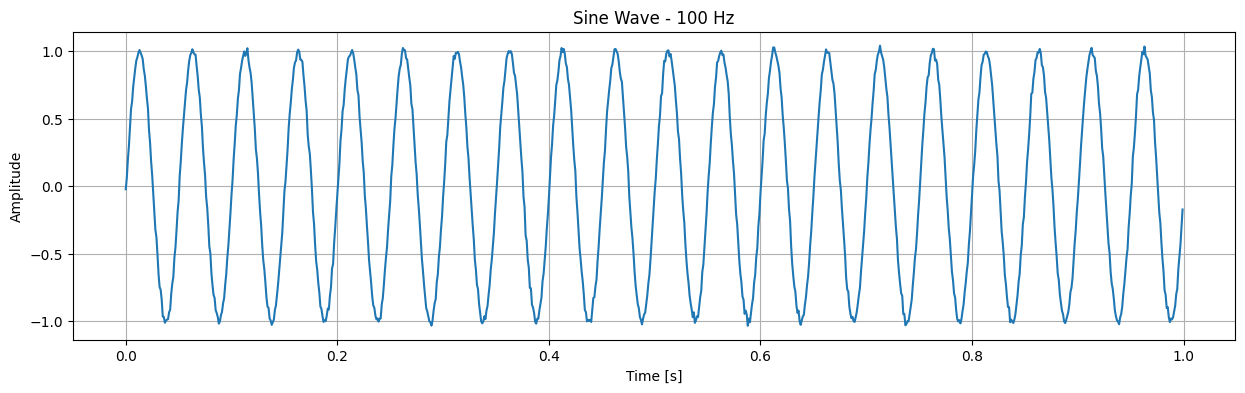

In [159]:
f = 20 # 100hz
fs = 1e3 # 1000 samples per second
ts = 1/fs
n = np.arange(1000)
t = n*ts

phi = np.random.uniform(0, 2*np.pi)

noise = np.random.normal(0, 0.02, t.shape)
x = np.sin(2*np.pi*f*t + phi) + noise

plt.figure(figsize=(15, 4))
plt.plot(t, x)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave - 100 Hz')
plt.grid()
plt.show()

In [179]:
class Gen_DB_sin():
    def __init__(self, f=20, fs=1e3, duration=1.0, noise_std=0.02):
        self.f = f
        self.fs = fs
        self.duration = duration
        self.noise_std = noise_std
        self.ts = 1/fs
        self.n_samples = int(fs * duration)
        self.t = np.arange(self.n_samples) * self.ts

    def generate_single_sample(self):
        phi = np.random.uniform(0, 2*np.pi)
        noise = np.random.normal(0, self.noise_std, self.t.shape)
        x = np.sin(2*np.pi*self.f*self.t + phi) + noise
        return x, self.t
    
    def generate_dataset(self, n_samples):
        X = []
        for _ in range(n_samples):
            x, _ = self.generate_single_sample()
            X.append(x)
        return np.array(X)
    


In [180]:

Gen_DB_sin_instance = Gen_DB_sin(f=20, fs=1e3, duration=1.0, noise_std=0.02)
X_dataset = Gen_DB_sin_instance.generate_dataset(n_samples=1000)

In [182]:
X_dataset

array([[ 0.35685681,  0.46999078,  0.57619901, ..., -0.00972829,
         0.10575888,  0.22722013],
       [ 0.93045801,  0.873257  ,  0.81706524, ...,  1.02001054,
         0.99223418,  0.94814002],
       [ 0.83199669,  0.75617617,  0.65402484, ...,  0.95711457,
         0.93310762,  0.87411009],
       ...,
       [-0.20017514, -0.31501878, -0.43549962, ...,  0.11975253,
         0.0140058 , -0.11365945],
       [ 0.97170697,  0.97387659,  1.01178697, ...,  0.87626177,
         0.93474812,  0.94118833],
       [ 0.09548895,  0.02224788, -0.13184851, ...,  0.46853006,
         0.40767192,  0.27335976]])

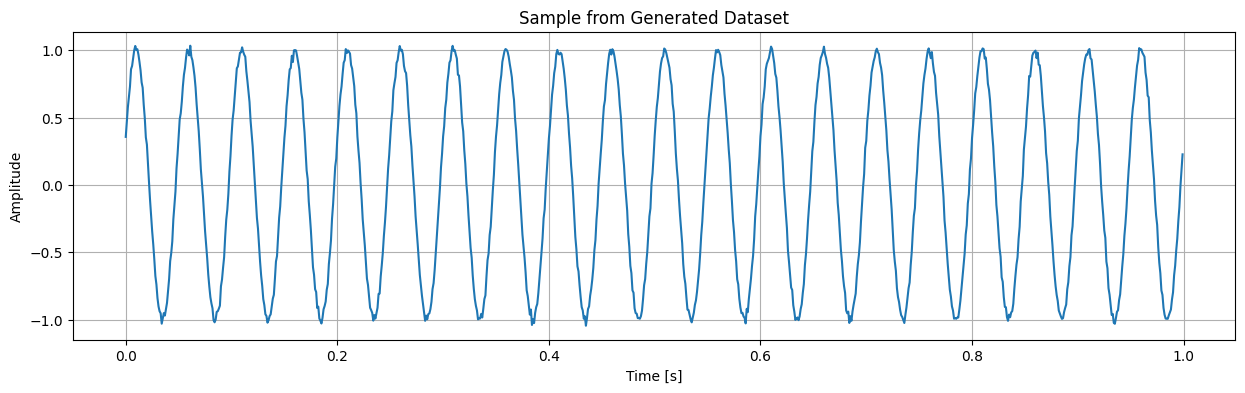

In [181]:
plt.figure(figsize=(15, 4))
plt.plot(Gen_DB_sin_instance.t, X_dataset[0,:])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sample from Generated Dataset')
plt.grid()
plt.show()

## Del dataset a tensores de torch

bach_size=32

In [184]:
import torch
import torch.nn as nn
from torch.optim import Adam, AdamW
from torch.utils.data import DataLoader, Dataset

In [185]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [186]:
seed = 2025
torch.manual_seed(seed)
np.random.seed(seed)

In [202]:
class SineWaveDataset:
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return self.data[idx]
    

def get_dataloader(data, batch_size=32, shuffle=True):
    dataset = SineWaveDataset(data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader



In [203]:
# dataset = SineWaveDataset(X_dataset)
# DataLoader(dataset, batch_size=32, shuffle=True)

# _ = next(iter(DataLoader(dataset, batch_size=32, shuffle=True)))
# _, _.shape

In [216]:
batch_size = 32

In [ ]:
dataset = SineWaveDataset(X_dataset)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

## Creacion del GAN vanilla

In [205]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, output_dim=1000):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [206]:
class Discriminator(nn.Module):
    def __init__(self, input_dim=1000):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            #nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

Epoch [20/5000], D Loss: 0.1884, G Loss: 5.0812
Epoch [40/5000], D Loss: 1.1829, G Loss: 3.7235
Epoch [60/5000], D Loss: 0.8231, G Loss: 1.1575
Epoch [80/5000], D Loss: 1.3025, G Loss: 2.3381
Epoch [100/5000], D Loss: 0.7887, G Loss: 1.9863


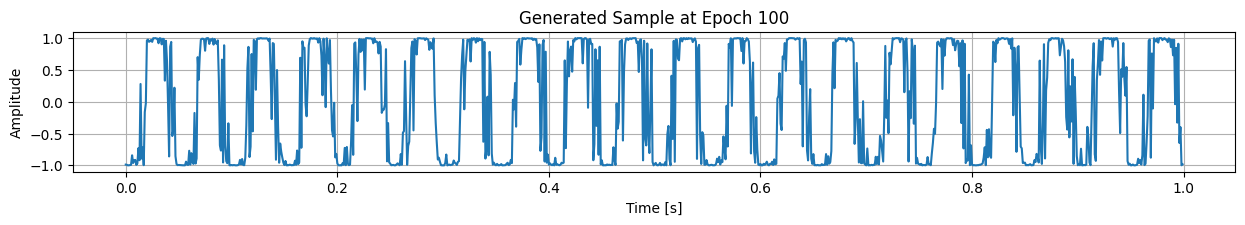

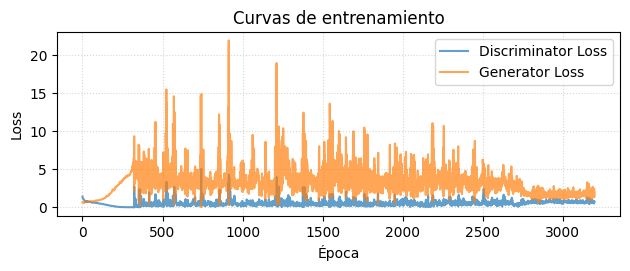

Epoch [120/5000], D Loss: 0.9677, G Loss: 3.0999
Epoch [140/5000], D Loss: 1.1111, G Loss: 1.0123
Epoch [160/5000], D Loss: 1.2037, G Loss: 0.9471
Epoch [180/5000], D Loss: 0.7941, G Loss: 1.2374
Epoch [200/5000], D Loss: 1.0612, G Loss: 1.3306


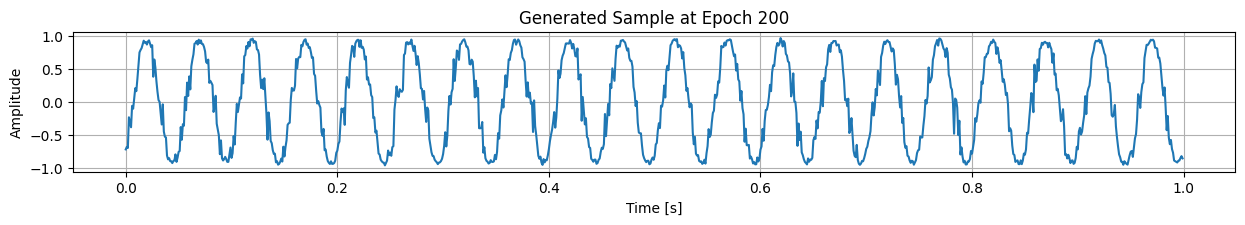

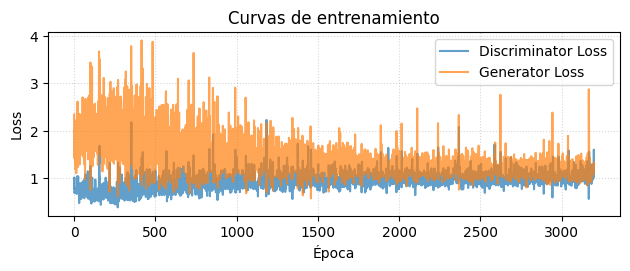

Epoch [220/5000], D Loss: 1.1371, G Loss: 0.8520
Epoch [240/5000], D Loss: 0.8592, G Loss: 1.3094
Epoch [260/5000], D Loss: 1.3397, G Loss: 1.0855
Epoch [280/5000], D Loss: 1.1485, G Loss: 0.9460
Epoch [300/5000], D Loss: 1.3505, G Loss: 0.8587


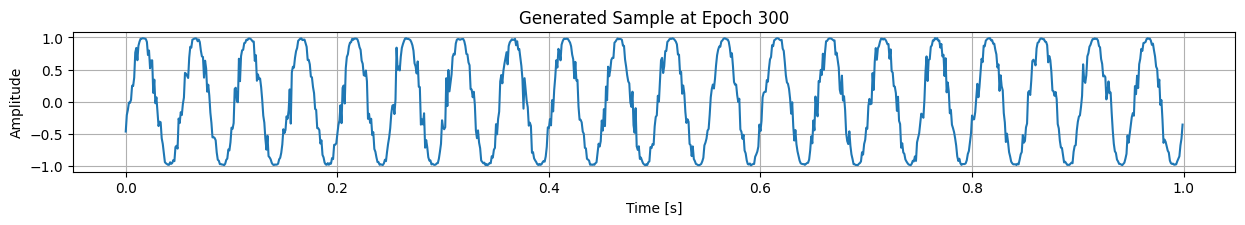

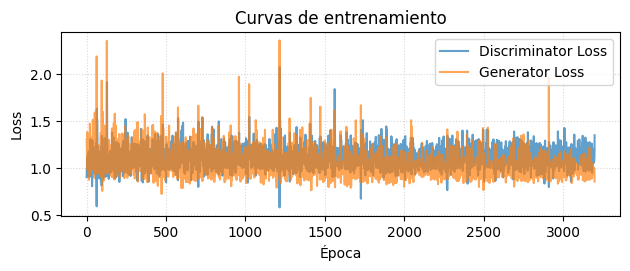

Epoch [320/5000], D Loss: 1.0895, G Loss: 1.2896
Epoch [340/5000], D Loss: 1.1387, G Loss: 1.0255
Epoch [360/5000], D Loss: 1.2139, G Loss: 0.9557
Epoch [380/5000], D Loss: 1.3868, G Loss: 1.2114
Epoch [400/5000], D Loss: 1.2281, G Loss: 0.9177


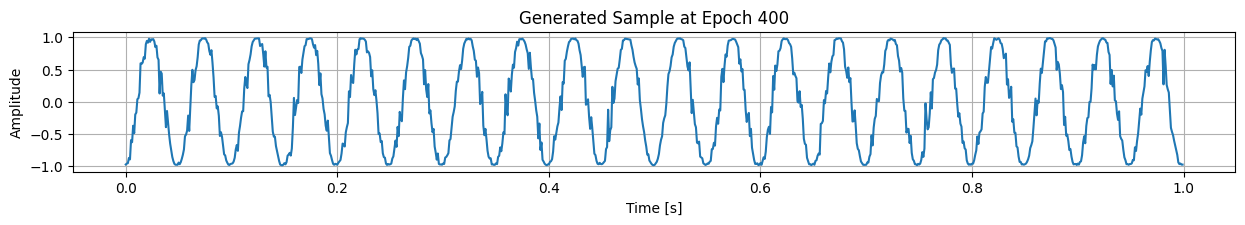

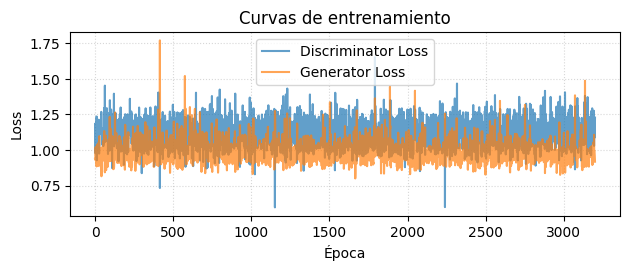

Epoch [420/5000], D Loss: 1.0031, G Loss: 1.3208
Epoch [440/5000], D Loss: 1.3004, G Loss: 1.3125
Epoch [460/5000], D Loss: 1.0495, G Loss: 0.9793
Epoch [480/5000], D Loss: 1.1734, G Loss: 0.9461
Epoch [500/5000], D Loss: 1.1102, G Loss: 0.8719


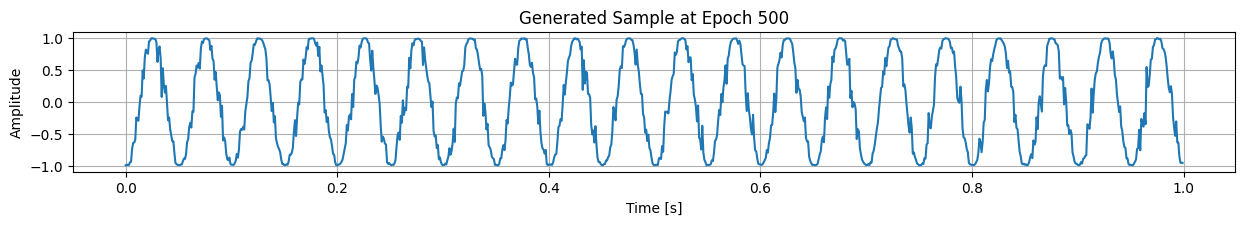

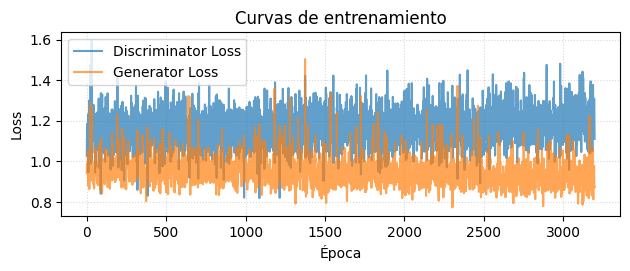

Epoch [520/5000], D Loss: 1.3518, G Loss: 1.4001
Epoch [540/5000], D Loss: 1.1539, G Loss: 1.1808
Epoch [560/5000], D Loss: 1.2727, G Loss: 0.8696
Epoch [580/5000], D Loss: 1.4814, G Loss: 0.9498
Epoch [600/5000], D Loss: 1.3515, G Loss: 0.9375


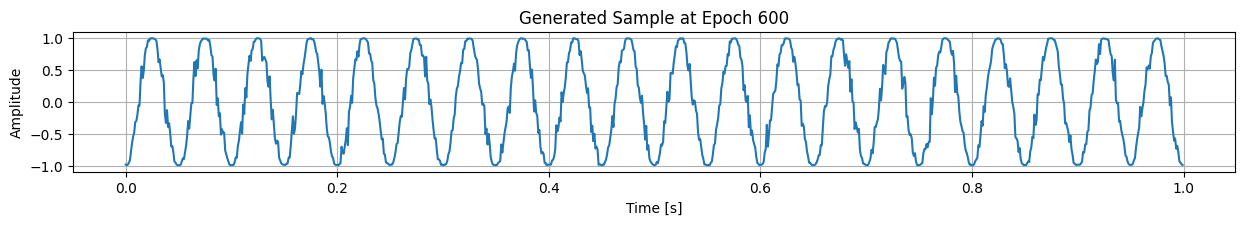

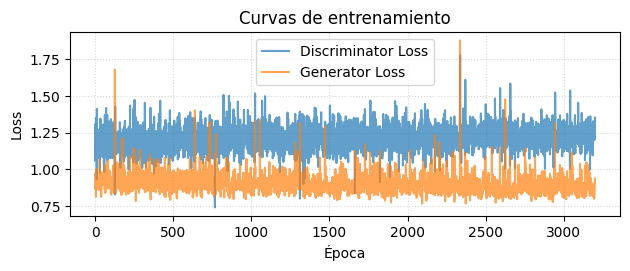

Epoch [620/5000], D Loss: 1.1988, G Loss: 0.9666
Epoch [640/5000], D Loss: 1.1998, G Loss: 0.8422
Epoch [660/5000], D Loss: 1.3171, G Loss: 1.0558
Epoch [680/5000], D Loss: 1.3372, G Loss: 0.9945
Epoch [700/5000], D Loss: 1.4627, G Loss: 0.9425


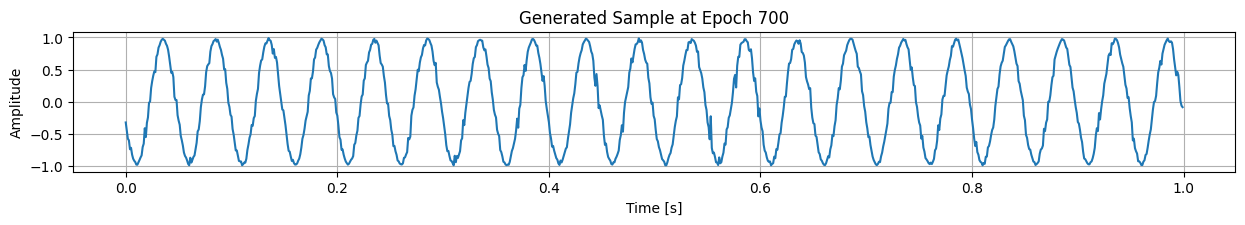

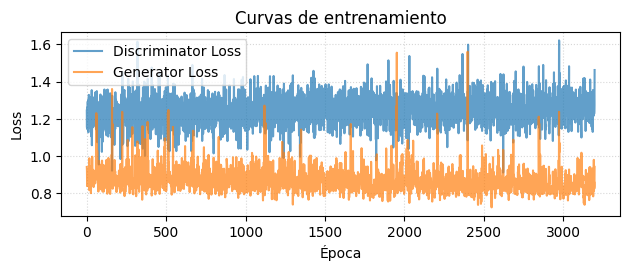

Epoch [720/5000], D Loss: 1.2304, G Loss: 0.7983
Epoch [740/5000], D Loss: 1.3397, G Loss: 0.8370
Epoch [760/5000], D Loss: 1.3366, G Loss: 0.8889
Epoch [780/5000], D Loss: 1.3656, G Loss: 0.8573
Epoch [800/5000], D Loss: 1.3656, G Loss: 0.8025


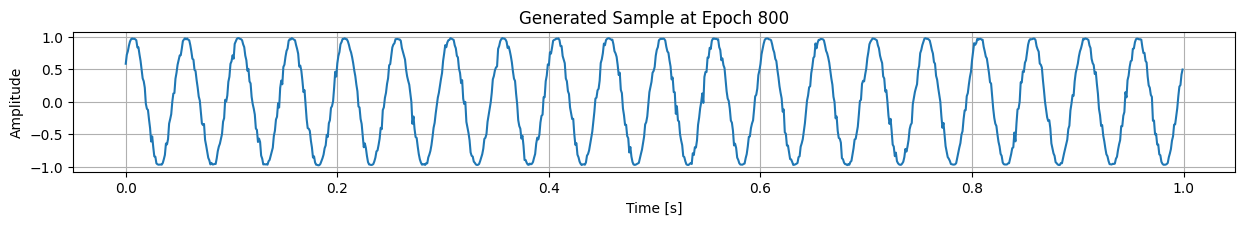

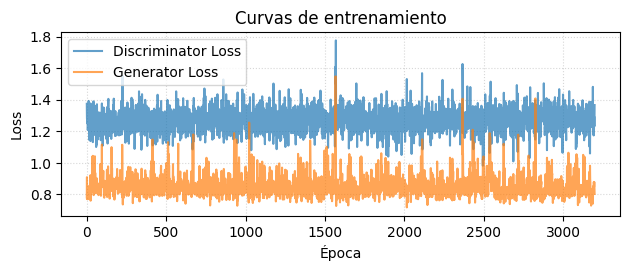

Epoch [820/5000], D Loss: 1.1533, G Loss: 0.9508
Epoch [840/5000], D Loss: 1.1628, G Loss: 0.7690
Epoch [860/5000], D Loss: 1.3227, G Loss: 0.9626
Epoch [880/5000], D Loss: 1.2374, G Loss: 0.8237
Epoch [900/5000], D Loss: 1.2691, G Loss: 0.9681


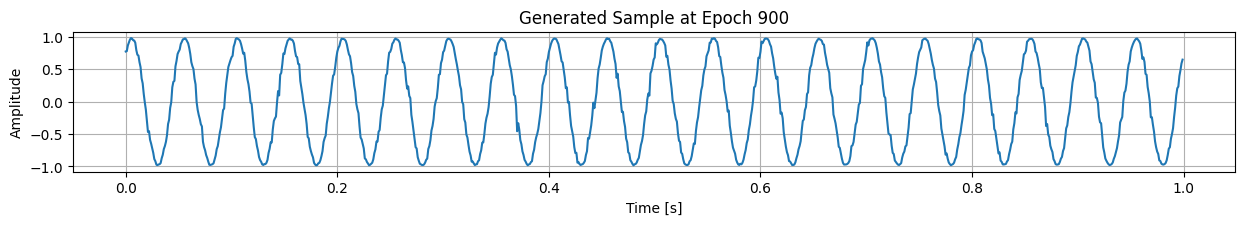

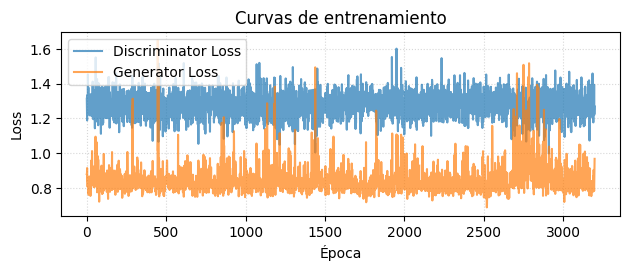

Epoch [920/5000], D Loss: 1.1735, G Loss: 0.8587
Epoch [940/5000], D Loss: 1.1961, G Loss: 0.8787
Epoch [960/5000], D Loss: 1.4253, G Loss: 0.8052
Epoch [980/5000], D Loss: 1.3810, G Loss: 0.8312
Epoch [1000/5000], D Loss: 1.2266, G Loss: 1.2081


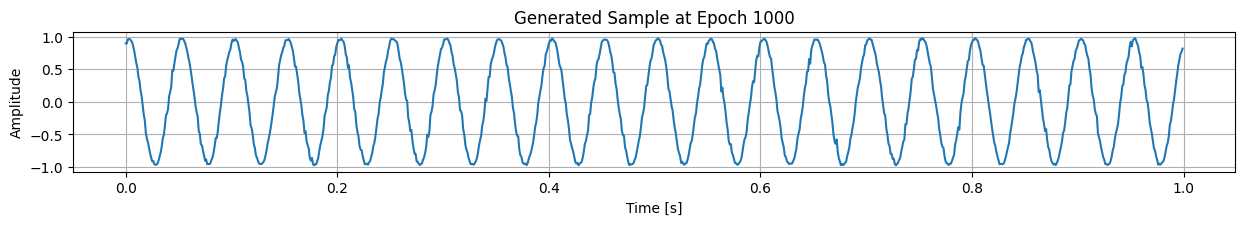

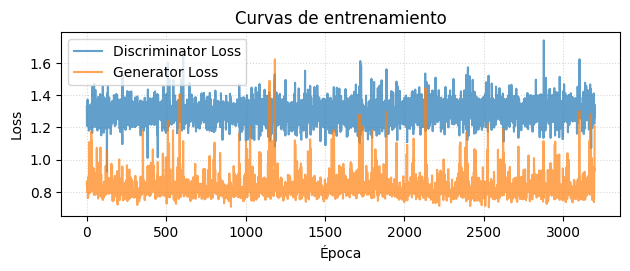

Epoch [1020/5000], D Loss: 1.2095, G Loss: 0.8822
Epoch [1040/5000], D Loss: 1.1731, G Loss: 0.9938
Epoch [1060/5000], D Loss: 1.3952, G Loss: 0.7890
Epoch [1080/5000], D Loss: 1.1865, G Loss: 1.0649
Epoch [1100/5000], D Loss: 1.2032, G Loss: 0.9433


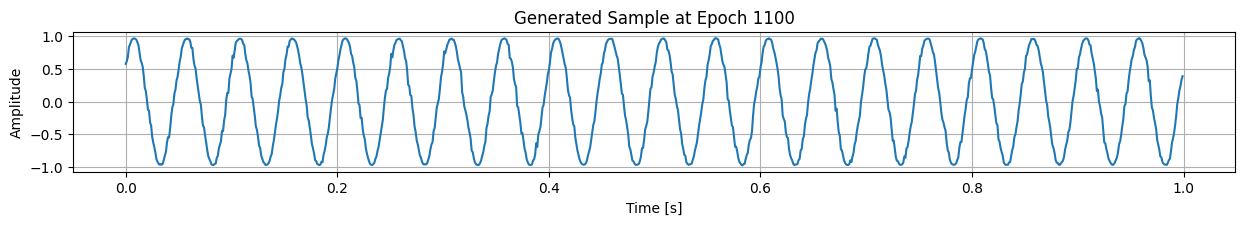

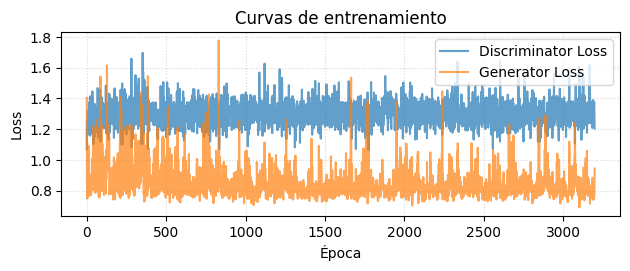

Epoch [1120/5000], D Loss: 1.2489, G Loss: 0.8159
Epoch [1140/5000], D Loss: 1.2329, G Loss: 0.8129
Epoch [1160/5000], D Loss: 1.2355, G Loss: 0.7955
Epoch [1180/5000], D Loss: 1.1862, G Loss: 1.4165
Epoch [1200/5000], D Loss: 1.4477, G Loss: 0.8736


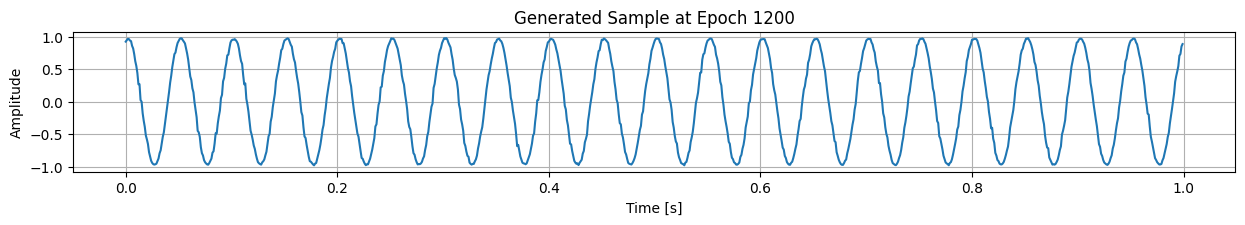

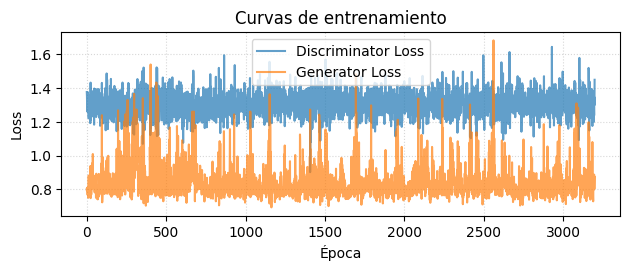

Epoch [1220/5000], D Loss: 1.3307, G Loss: 1.2496
Epoch [1240/5000], D Loss: 1.3294, G Loss: 0.7927
Epoch [1260/5000], D Loss: 1.2772, G Loss: 0.9382
Epoch [1280/5000], D Loss: 1.4637, G Loss: 1.0527
Epoch [1300/5000], D Loss: 1.2776, G Loss: 0.8816


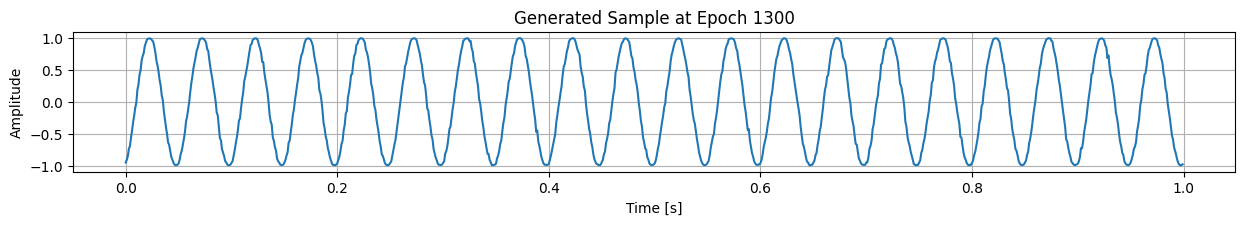

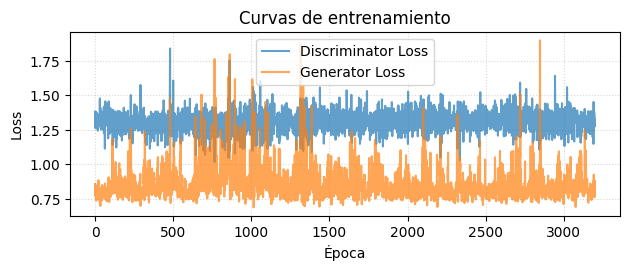

Epoch [1320/5000], D Loss: 1.2826, G Loss: 0.8113
Epoch [1340/5000], D Loss: 1.1654, G Loss: 0.9404
Epoch [1360/5000], D Loss: 1.3217, G Loss: 0.8558
Epoch [1380/5000], D Loss: 1.2586, G Loss: 1.1415
Epoch [1400/5000], D Loss: 1.2880, G Loss: 0.9812


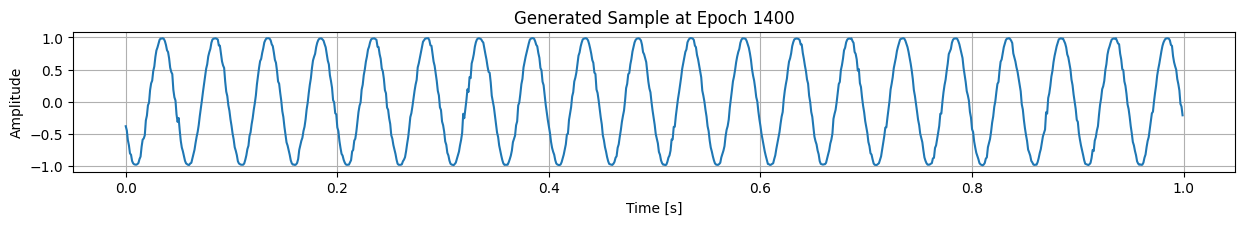

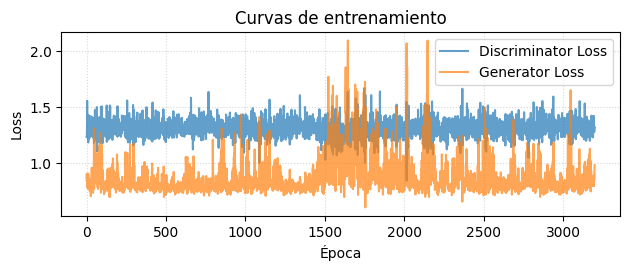

Epoch [1420/5000], D Loss: 1.3159, G Loss: 0.9135
Epoch [1440/5000], D Loss: 1.2232, G Loss: 1.0684
Epoch [1460/5000], D Loss: 1.4078, G Loss: 0.9010
Epoch [1480/5000], D Loss: 1.3889, G Loss: 2.2537
Epoch [1500/5000], D Loss: 1.3768, G Loss: 0.7927


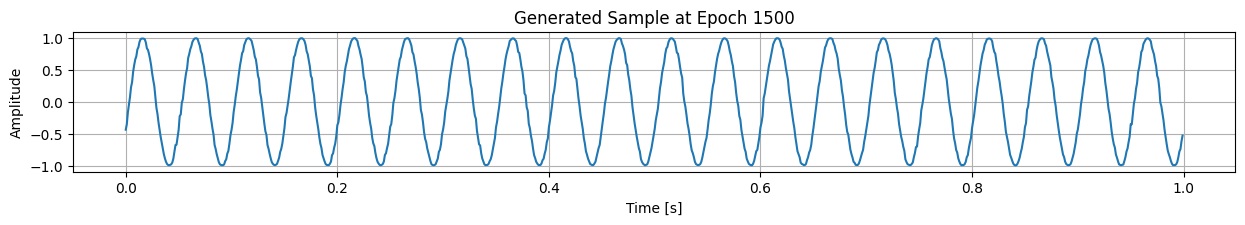

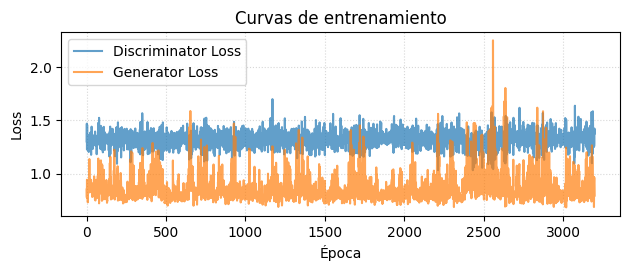

Epoch [1520/5000], D Loss: 1.4053, G Loss: 1.2923
Epoch [1540/5000], D Loss: 1.3090, G Loss: 0.7859
Epoch [1560/5000], D Loss: 1.4769, G Loss: 0.9946
Epoch [1580/5000], D Loss: 1.4111, G Loss: 1.0775
Epoch [1600/5000], D Loss: 1.2348, G Loss: 0.9174


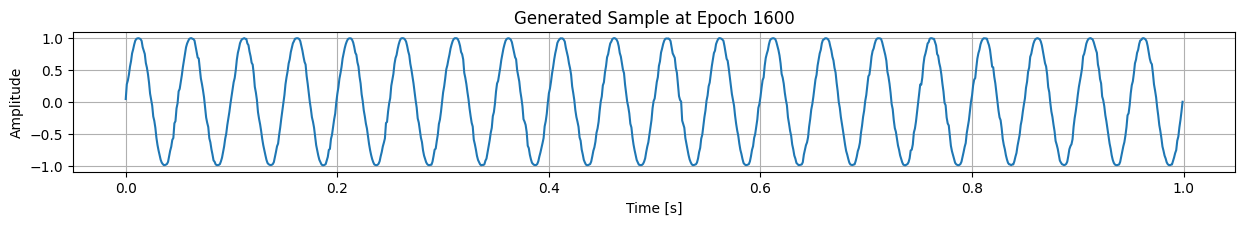

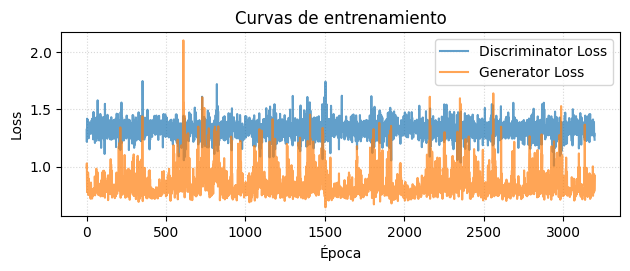

Epoch [1620/5000], D Loss: 1.4848, G Loss: 0.7682
Epoch [1640/5000], D Loss: 1.3382, G Loss: 0.8143
Epoch [1660/5000], D Loss: 1.4035, G Loss: 0.8537
Epoch [1680/5000], D Loss: 1.5278, G Loss: 1.0979
Epoch [1700/5000], D Loss: 1.2825, G Loss: 0.9737


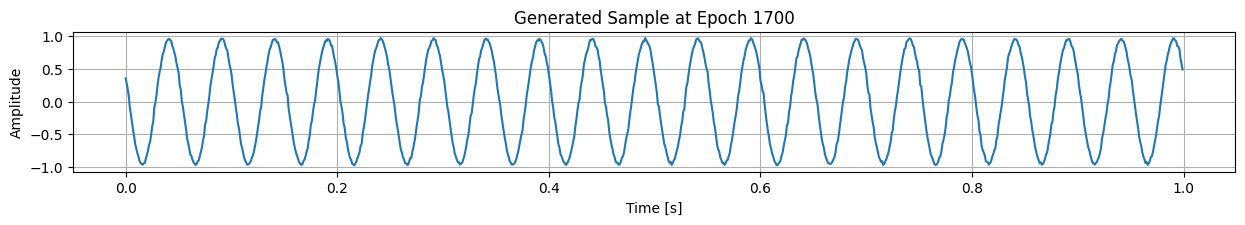

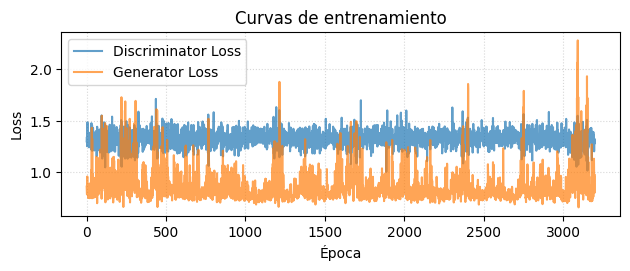

Epoch [1720/5000], D Loss: 1.2942, G Loss: 1.1972
Epoch [1740/5000], D Loss: 1.2331, G Loss: 0.9486
Epoch [1760/5000], D Loss: 1.2029, G Loss: 1.0084
Epoch [1780/5000], D Loss: 1.2874, G Loss: 0.9566
Epoch [1800/5000], D Loss: 1.3434, G Loss: 1.3960


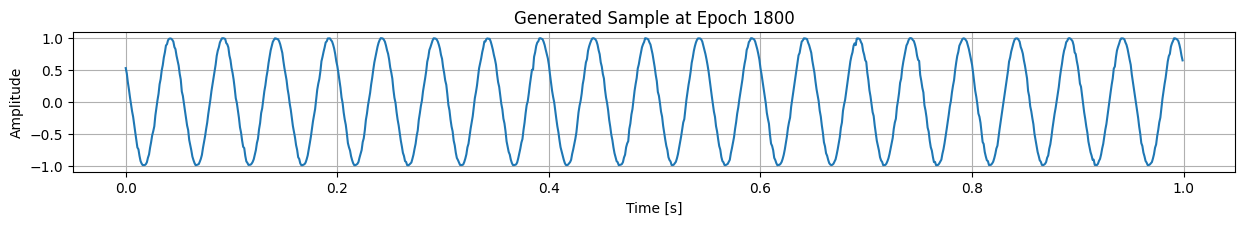

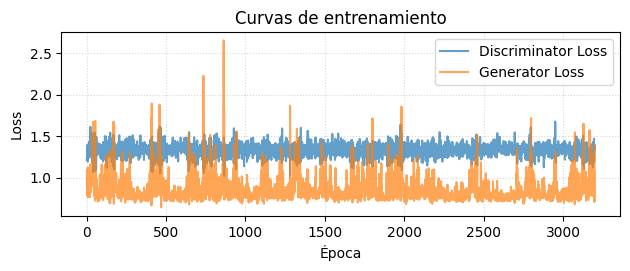

Epoch [1820/5000], D Loss: 1.3191, G Loss: 0.7916
Epoch [1840/5000], D Loss: 1.6853, G Loss: 1.9422
Epoch [1860/5000], D Loss: 1.4632, G Loss: 0.8986
Epoch [1880/5000], D Loss: 1.2952, G Loss: 0.9650
Epoch [1900/5000], D Loss: 1.1045, G Loss: 1.0684


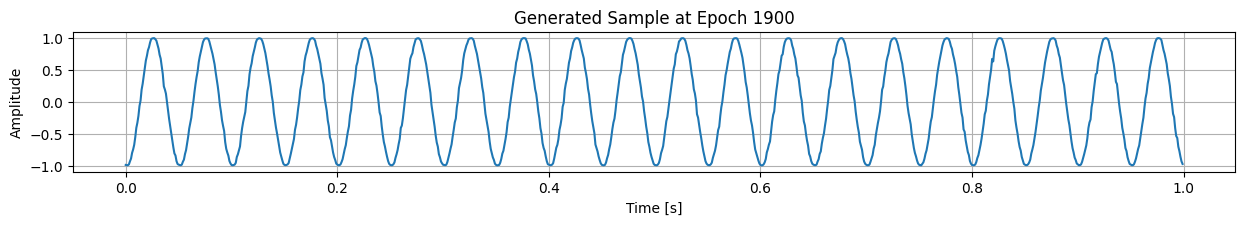

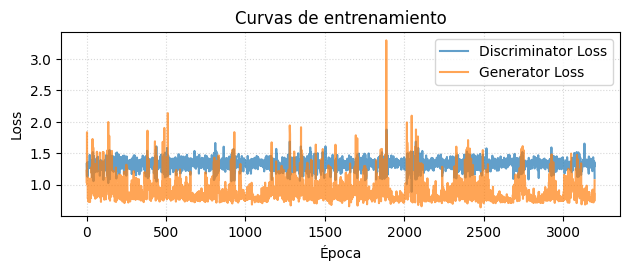

Epoch [1920/5000], D Loss: 1.4490, G Loss: 0.8197
Epoch [1940/5000], D Loss: 1.2918, G Loss: 1.2038
Epoch [1960/5000], D Loss: 1.3481, G Loss: 1.6594
Epoch [1980/5000], D Loss: 1.2424, G Loss: 0.9577
Epoch [2000/5000], D Loss: 1.3145, G Loss: 0.7885


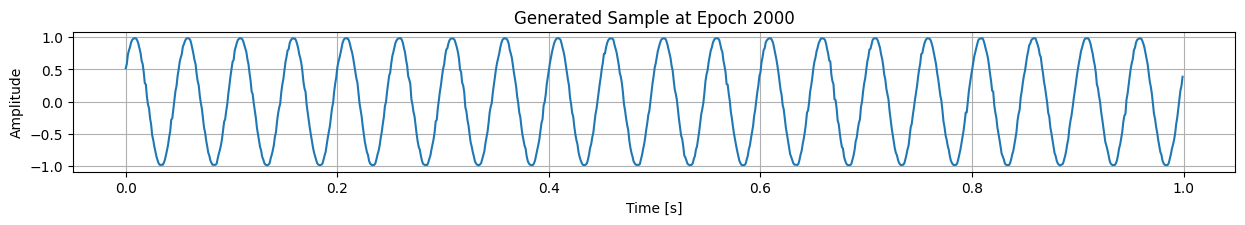

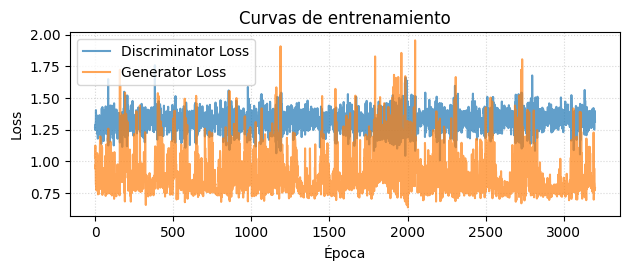

Epoch [2020/5000], D Loss: 1.3008, G Loss: 1.6329
Epoch [2040/5000], D Loss: 1.3676, G Loss: 0.9177
Epoch [2060/5000], D Loss: 1.3635, G Loss: 0.8339
Epoch [2080/5000], D Loss: 1.3410, G Loss: 1.2243
Epoch [2100/5000], D Loss: 1.2911, G Loss: 0.8360


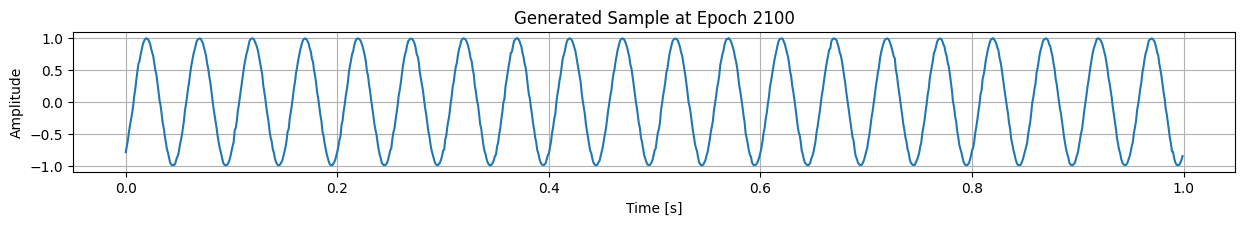

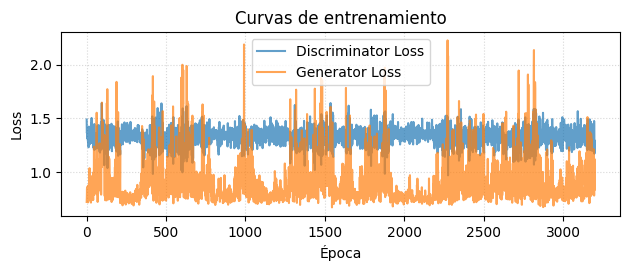

Epoch [2120/5000], D Loss: 1.2615, G Loss: 1.1395
Epoch [2140/5000], D Loss: 1.3863, G Loss: 0.8061
Epoch [2160/5000], D Loss: 1.2665, G Loss: 1.3241
Epoch [2180/5000], D Loss: 1.3718, G Loss: 0.7841
Epoch [2200/5000], D Loss: 1.3597, G Loss: 0.8228


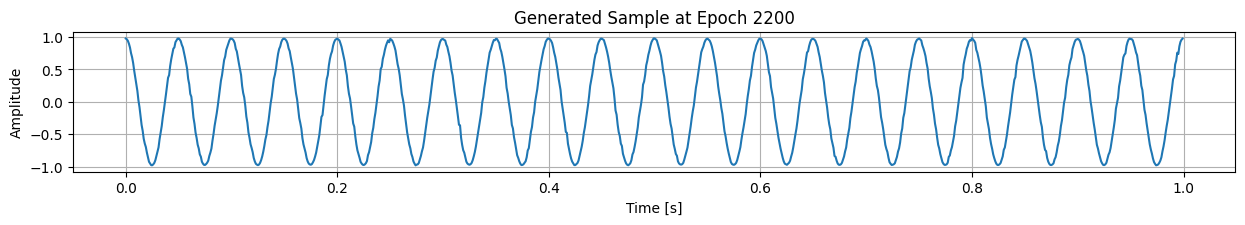

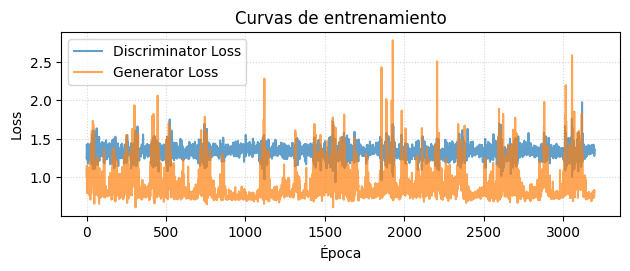

Epoch [2220/5000], D Loss: 1.3461, G Loss: 0.8455
Epoch [2240/5000], D Loss: 1.2751, G Loss: 0.9124
Epoch [2260/5000], D Loss: 1.2364, G Loss: 0.9328
Epoch [2280/5000], D Loss: 0.9520, G Loss: 2.4169
Epoch [2300/5000], D Loss: 1.3213, G Loss: 0.9359


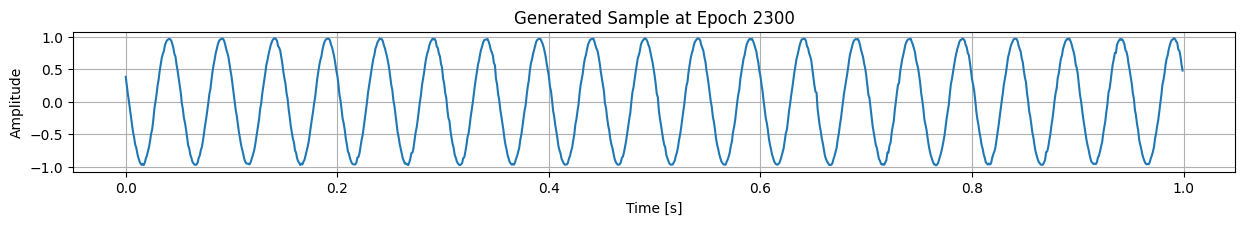

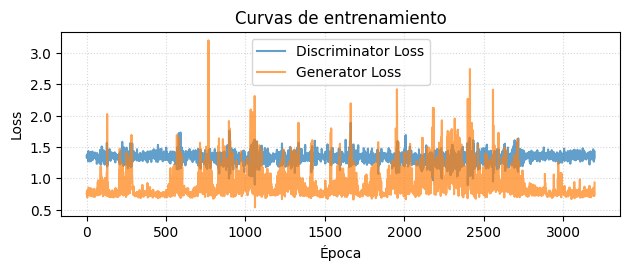

Epoch [2320/5000], D Loss: 1.3294, G Loss: 0.8438
Epoch [2340/5000], D Loss: 1.3456, G Loss: 0.8243
Epoch [2360/5000], D Loss: 1.1138, G Loss: 3.0459
Epoch [2380/5000], D Loss: 1.3166, G Loss: 1.0617
Epoch [2400/5000], D Loss: 1.3333, G Loss: 0.9832


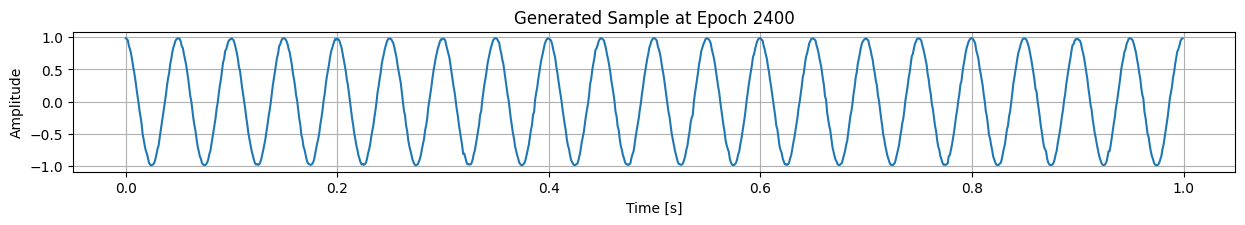

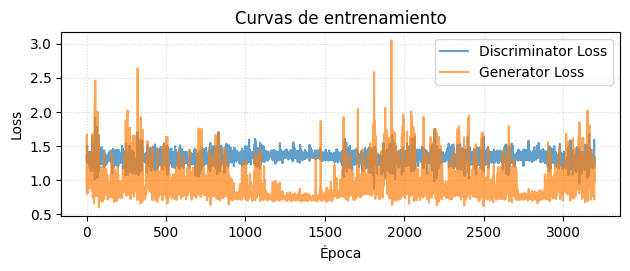

Epoch [2420/5000], D Loss: 1.3161, G Loss: 0.9282
Epoch [2440/5000], D Loss: 1.1708, G Loss: 1.3510
Epoch [2460/5000], D Loss: 1.4058, G Loss: 0.8195
Epoch [2480/5000], D Loss: 1.3344, G Loss: 0.9019
Epoch [2500/5000], D Loss: 1.3967, G Loss: 0.7615


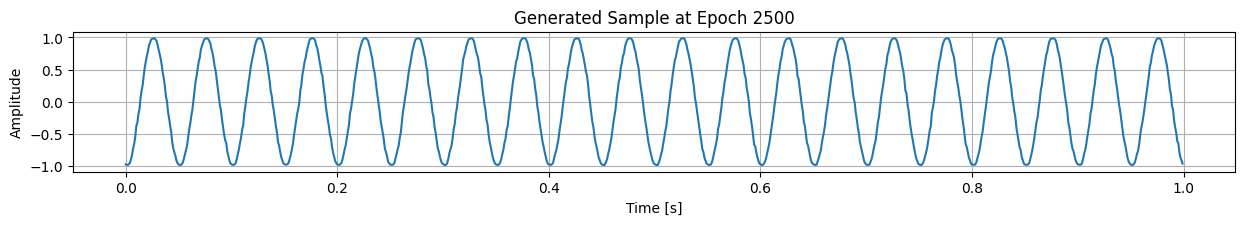

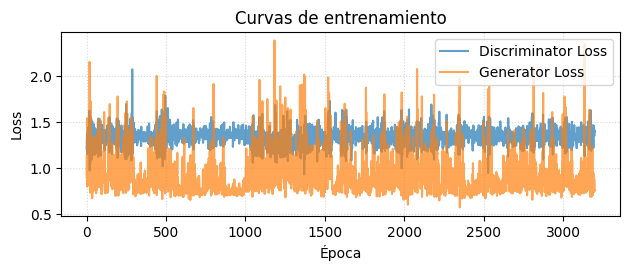

Epoch [2520/5000], D Loss: 1.4197, G Loss: 0.9403
Epoch [2540/5000], D Loss: 1.4241, G Loss: 0.7627
Epoch [2560/5000], D Loss: 1.3458, G Loss: 0.9629
Epoch [2580/5000], D Loss: 0.9675, G Loss: 1.6682
Epoch [2600/5000], D Loss: 1.3033, G Loss: 0.8695


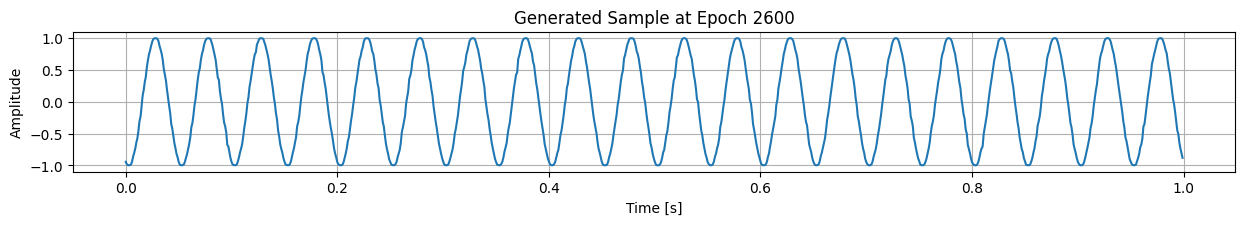

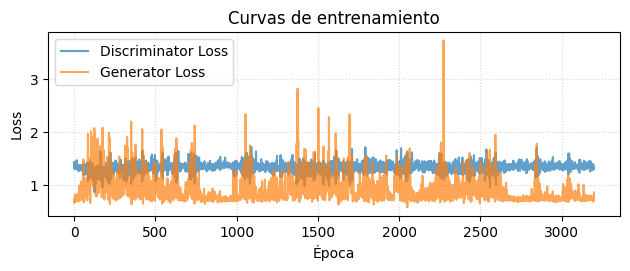

Epoch [2620/5000], D Loss: 1.2594, G Loss: 1.6526
Epoch [2640/5000], D Loss: 1.3580, G Loss: 0.8991
Epoch [2660/5000], D Loss: 1.1509, G Loss: 1.3813
Epoch [2680/5000], D Loss: 1.2546, G Loss: 1.6015
Epoch [2700/5000], D Loss: 1.2947, G Loss: 0.8945


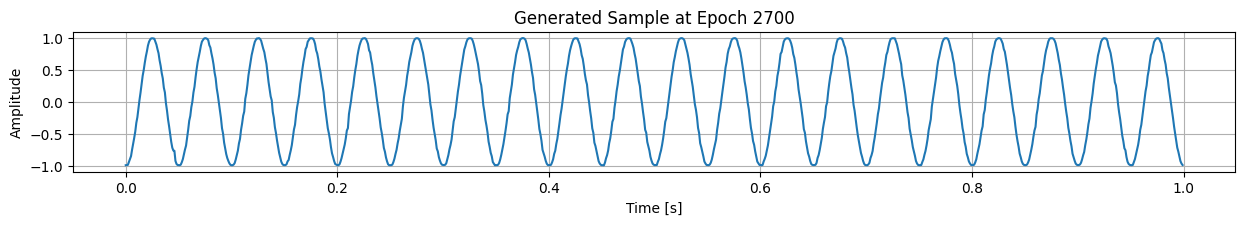

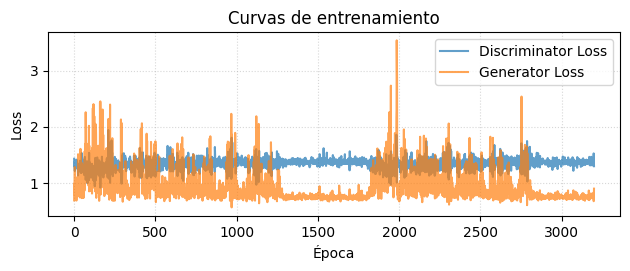

Epoch [2720/5000], D Loss: 1.4355, G Loss: 0.7337
Epoch [2740/5000], D Loss: 1.3110, G Loss: 1.2111
Epoch [2760/5000], D Loss: 1.3764, G Loss: 0.8128
Epoch [2780/5000], D Loss: 1.4620, G Loss: 0.8368
Epoch [2800/5000], D Loss: 1.3941, G Loss: 0.8506


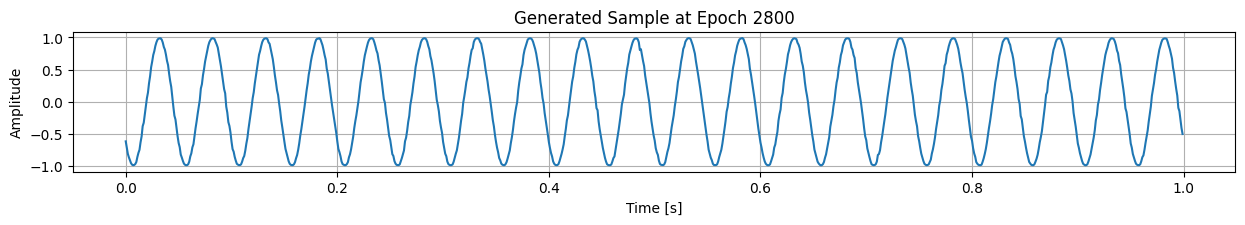

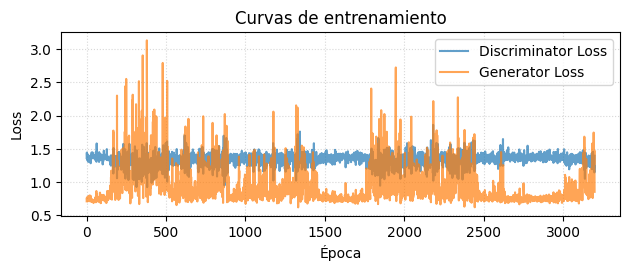

Epoch [2820/5000], D Loss: 1.2879, G Loss: 1.0448
Epoch [2840/5000], D Loss: 1.3218, G Loss: 0.8239
Epoch [2860/5000], D Loss: 1.2993, G Loss: 0.8376
Epoch [2880/5000], D Loss: 1.2759, G Loss: 1.1857
Epoch [2900/5000], D Loss: 1.2848, G Loss: 1.3608


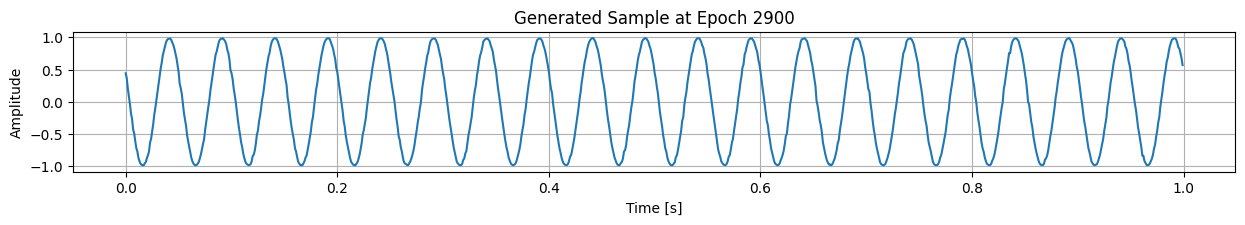

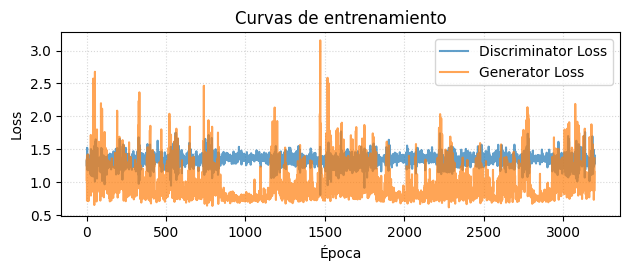

Epoch [2920/5000], D Loss: 1.2101, G Loss: 1.0807
Epoch [2940/5000], D Loss: 1.4237, G Loss: 0.7900
Epoch [2960/5000], D Loss: 1.6626, G Loss: 1.1441
Epoch [2980/5000], D Loss: 1.3361, G Loss: 0.9841
Epoch [3000/5000], D Loss: 1.1719, G Loss: 2.1029


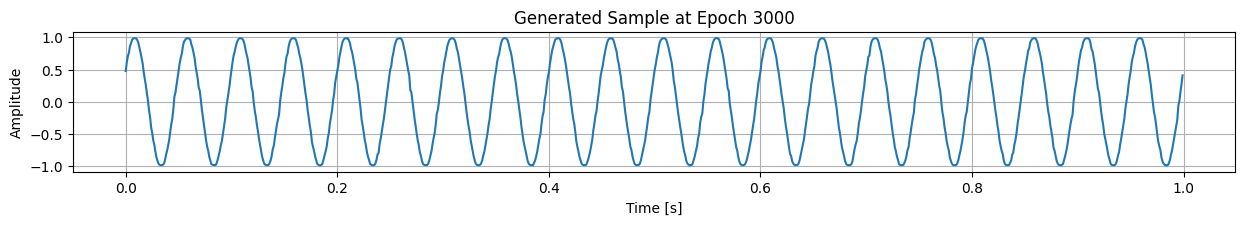

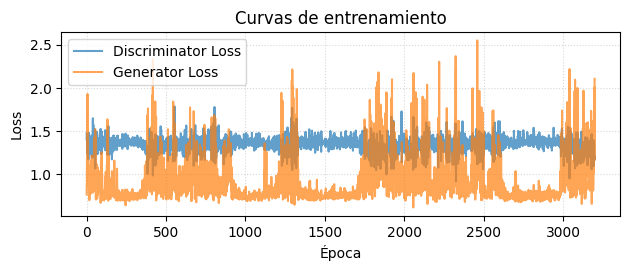

Epoch [3020/5000], D Loss: 1.2722, G Loss: 0.8310
Epoch [3040/5000], D Loss: 1.3956, G Loss: 2.1074
Epoch [3060/5000], D Loss: 1.4835, G Loss: 0.7901
Epoch [3080/5000], D Loss: 1.4311, G Loss: 0.7226
Epoch [3100/5000], D Loss: 1.3697, G Loss: 1.4473


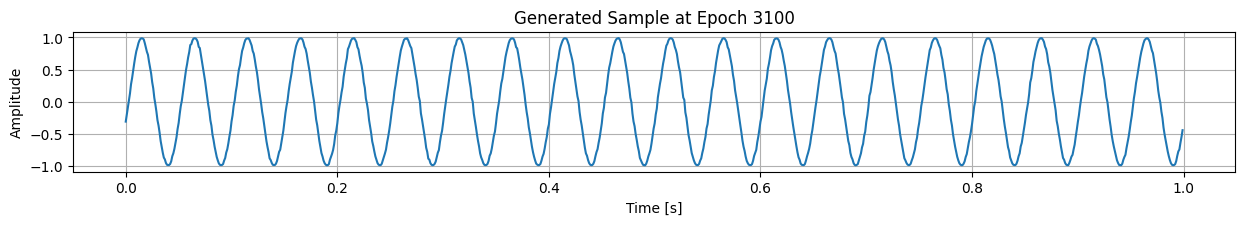

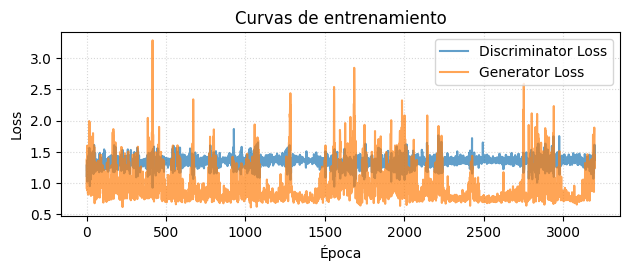

Epoch [3120/5000], D Loss: 1.4414, G Loss: 0.9552
Epoch [3140/5000], D Loss: 1.4045, G Loss: 0.7879
Epoch [3160/5000], D Loss: 1.0471, G Loss: 3.1741
Epoch [3180/5000], D Loss: 1.3914, G Loss: 0.9008
Epoch [3200/5000], D Loss: 1.3957, G Loss: 0.7165


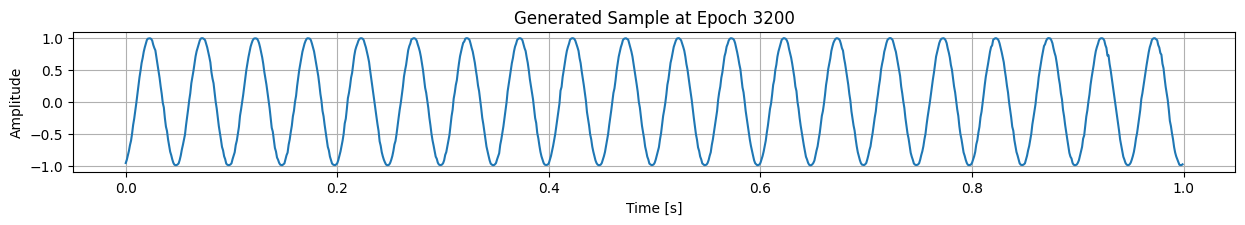

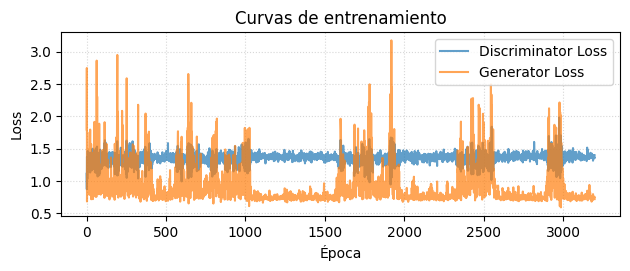

Epoch [3220/5000], D Loss: 1.1509, G Loss: 1.7737
Epoch [3240/5000], D Loss: 1.3420, G Loss: 0.7703
Epoch [3260/5000], D Loss: 1.3150, G Loss: 0.7619
Epoch [3280/5000], D Loss: 1.3868, G Loss: 0.7818
Epoch [3300/5000], D Loss: 1.6703, G Loss: 0.7579


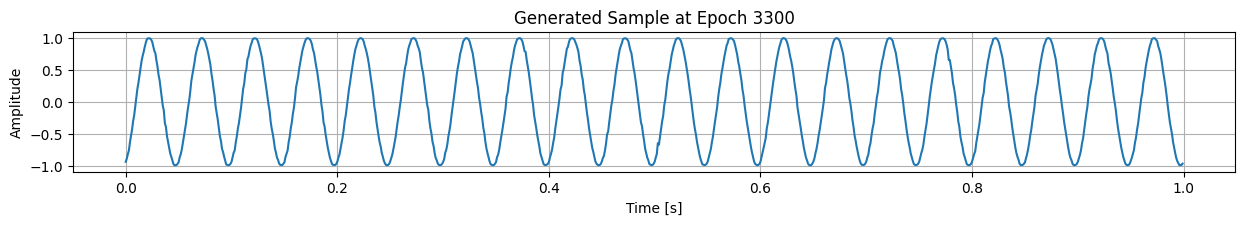

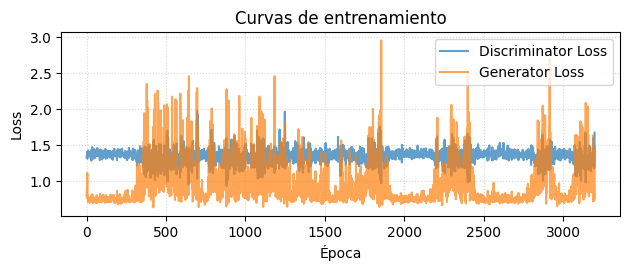

Epoch [3320/5000], D Loss: 1.2063, G Loss: 1.0652
Epoch [3340/5000], D Loss: 1.4965, G Loss: 0.7155
Epoch [3360/5000], D Loss: 1.2546, G Loss: 1.6638
Epoch [3380/5000], D Loss: 1.3651, G Loss: 0.8405
Epoch [3400/5000], D Loss: 1.1959, G Loss: 1.3602


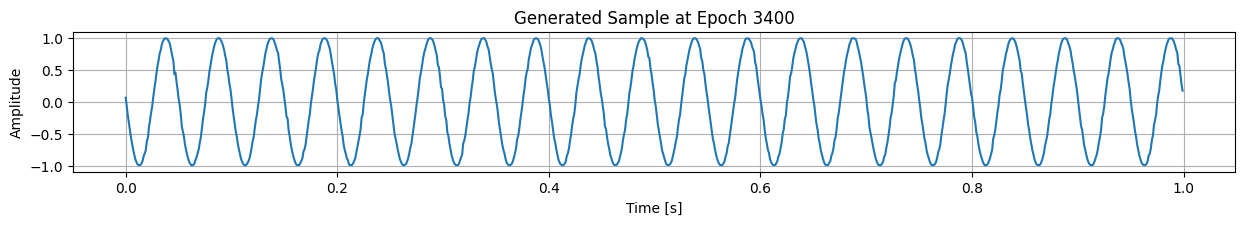

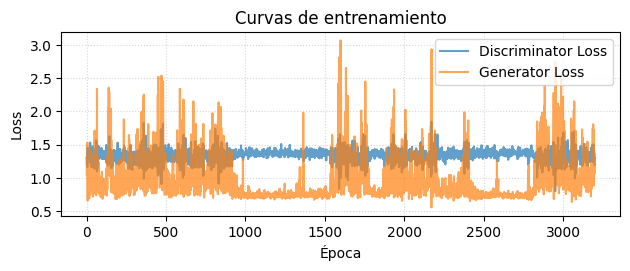

Epoch [3420/5000], D Loss: 1.5147, G Loss: 0.7959
Epoch [3440/5000], D Loss: 1.3079, G Loss: 0.9481
Epoch [3460/5000], D Loss: 1.4023, G Loss: 0.7704
Epoch [3480/5000], D Loss: 1.3334, G Loss: 1.6911
Epoch [3500/5000], D Loss: 1.2790, G Loss: 0.8893


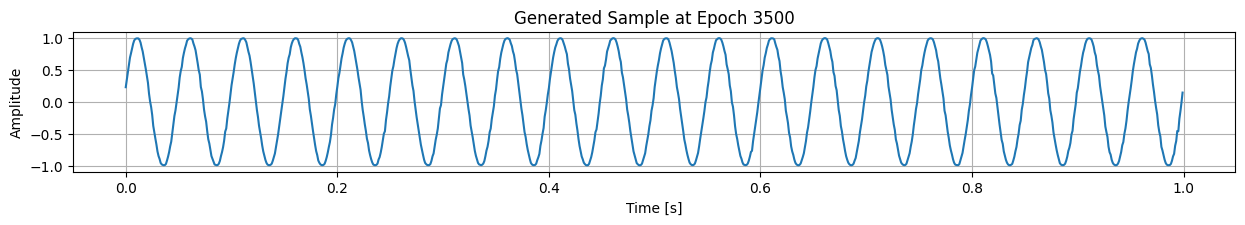

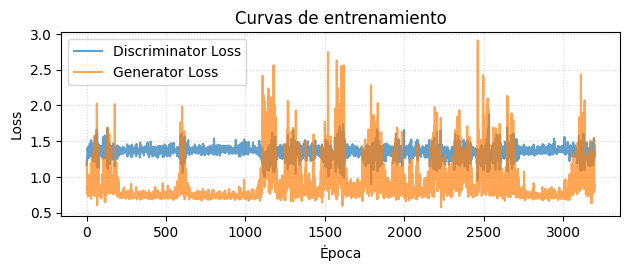

Epoch [3520/5000], D Loss: 1.3442, G Loss: 0.8356
Epoch [3540/5000], D Loss: 1.3548, G Loss: 0.8197
Epoch [3560/5000], D Loss: 1.3401, G Loss: 0.9472
Epoch [3580/5000], D Loss: 1.3472, G Loss: 0.7377
Epoch [3600/5000], D Loss: 1.6651, G Loss: 1.6182


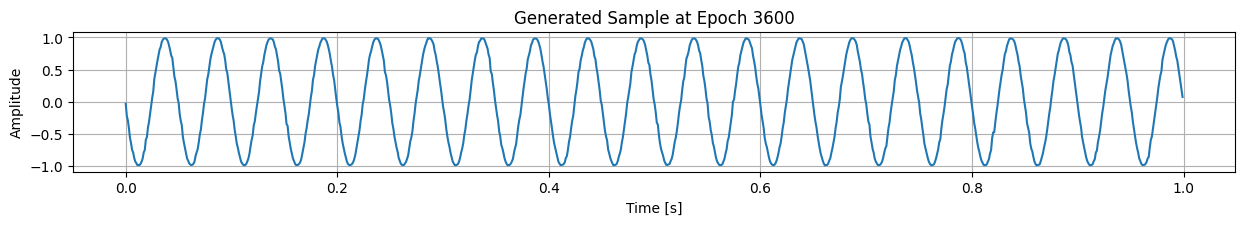

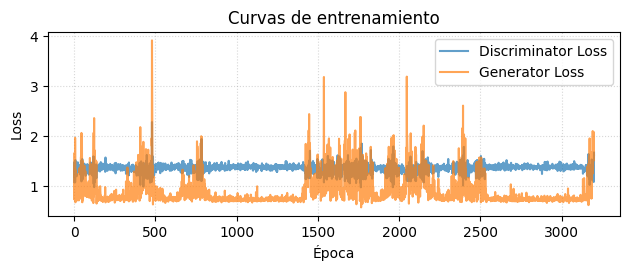

Epoch [3620/5000], D Loss: 1.3896, G Loss: 0.7301
Epoch [3640/5000], D Loss: 1.3115, G Loss: 1.5110
Epoch [3660/5000], D Loss: 1.3884, G Loss: 0.7461
Epoch [3680/5000], D Loss: 1.4286, G Loss: 0.9161
Epoch [3700/5000], D Loss: 1.2773, G Loss: 1.0581


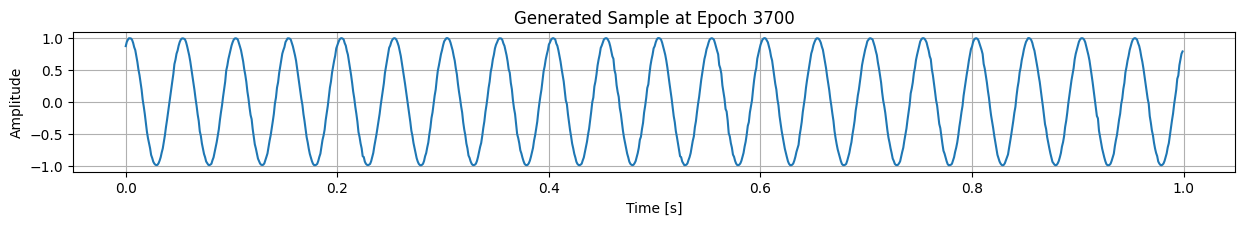

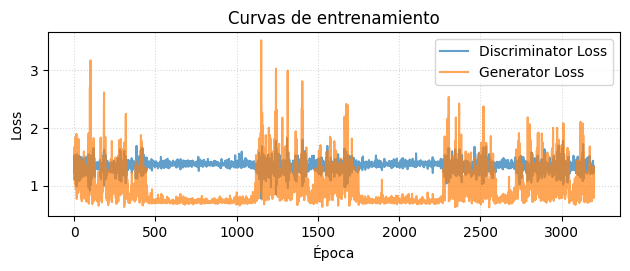

Epoch [3720/5000], D Loss: 1.3840, G Loss: 0.7884
Epoch [3740/5000], D Loss: 1.4766, G Loss: 0.7516
Epoch [3760/5000], D Loss: 1.3800, G Loss: 0.7481
Epoch [3780/5000], D Loss: 1.3875, G Loss: 1.2539
Epoch [3800/5000], D Loss: 1.3347, G Loss: 0.7892


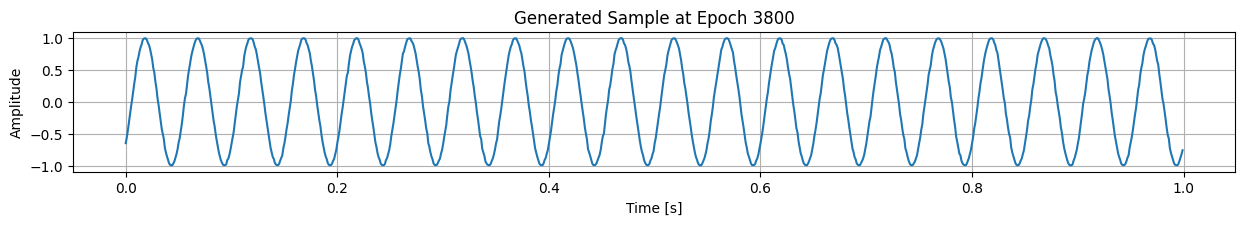

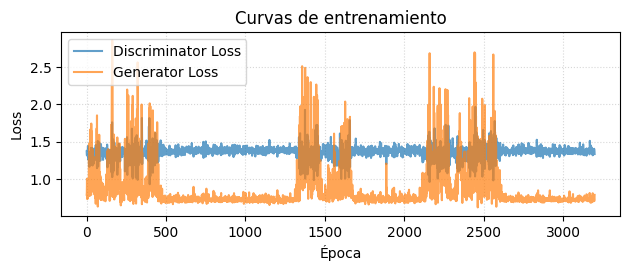

Epoch [3820/5000], D Loss: 1.4239, G Loss: 0.8214
Epoch [3840/5000], D Loss: 1.3512, G Loss: 0.8437
Epoch [3860/5000], D Loss: 1.1462, G Loss: 1.4948
Epoch [3880/5000], D Loss: 1.3799, G Loss: 1.0997
Epoch [3900/5000], D Loss: 1.2944, G Loss: 0.7825


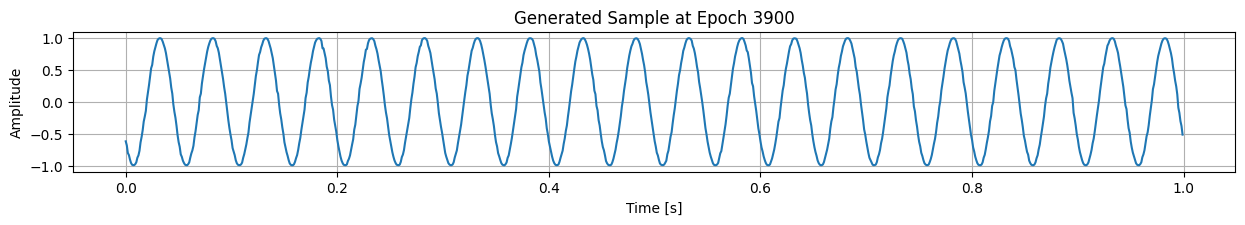

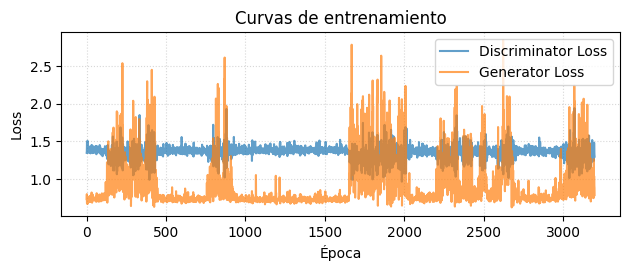

Epoch [3920/5000], D Loss: 1.2492, G Loss: 1.6325
Epoch [3940/5000], D Loss: 1.6779, G Loss: 1.4872
Epoch [3960/5000], D Loss: 1.3420, G Loss: 0.7383
Epoch [3980/5000], D Loss: 1.3732, G Loss: 0.7825
Epoch [4000/5000], D Loss: 1.4444, G Loss: 0.7522


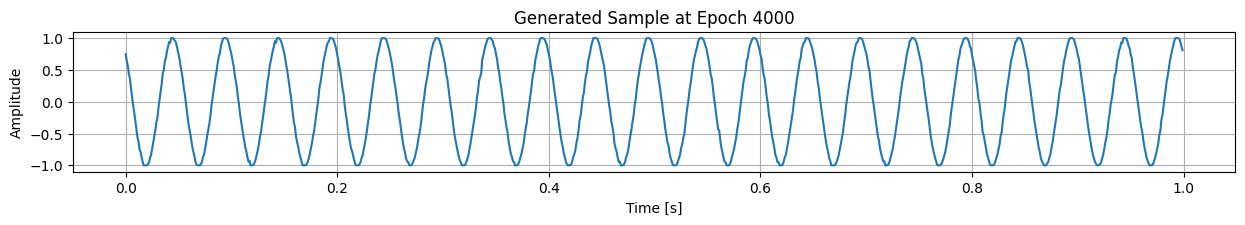

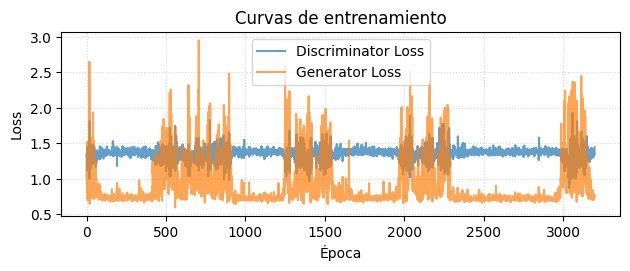

Epoch [4020/5000], D Loss: 1.3530, G Loss: 0.7987
Epoch [4040/5000], D Loss: 1.3527, G Loss: 0.7977
Epoch [4060/5000], D Loss: 1.4418, G Loss: 0.7546
Epoch [4080/5000], D Loss: 1.3623, G Loss: 0.7978
Epoch [4100/5000], D Loss: 1.3652, G Loss: 0.8961


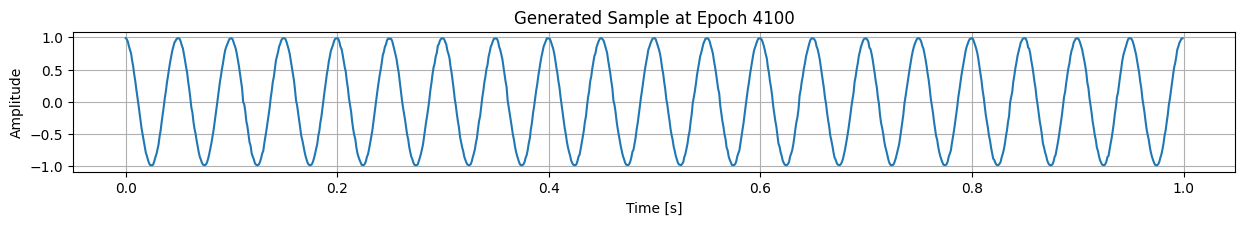

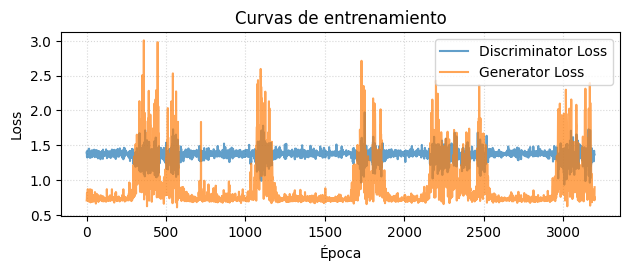

Epoch [4120/5000], D Loss: 1.2878, G Loss: 1.3284
Epoch [4140/5000], D Loss: 1.4539, G Loss: 0.7709
Epoch [4160/5000], D Loss: 1.3139, G Loss: 0.7947
Epoch [4180/5000], D Loss: 1.3422, G Loss: 0.9522
Epoch [4200/5000], D Loss: 1.3054, G Loss: 0.7495


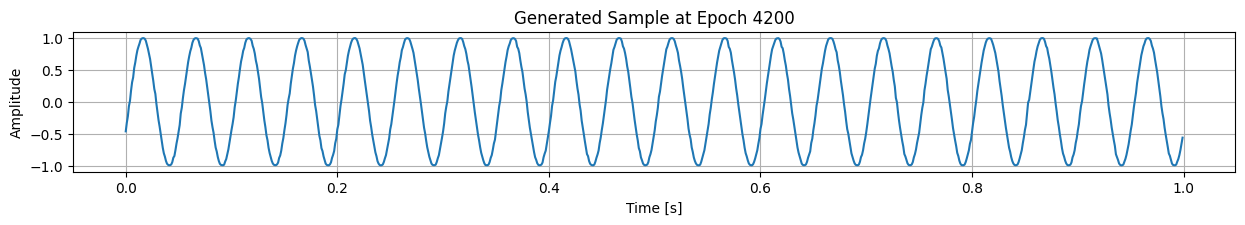

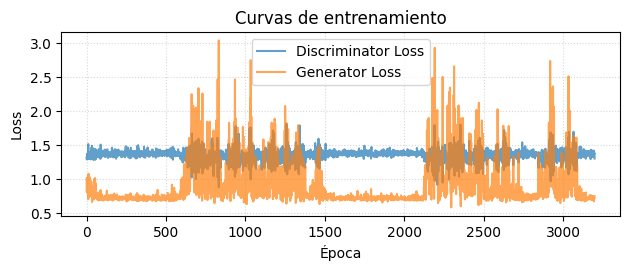

Epoch [4220/5000], D Loss: 1.4279, G Loss: 0.8247
Epoch [4240/5000], D Loss: 1.4740, G Loss: 1.4144
Epoch [4260/5000], D Loss: 1.3886, G Loss: 0.7432
Epoch [4280/5000], D Loss: 1.3156, G Loss: 0.8815
Epoch [4300/5000], D Loss: 1.4379, G Loss: 0.7332


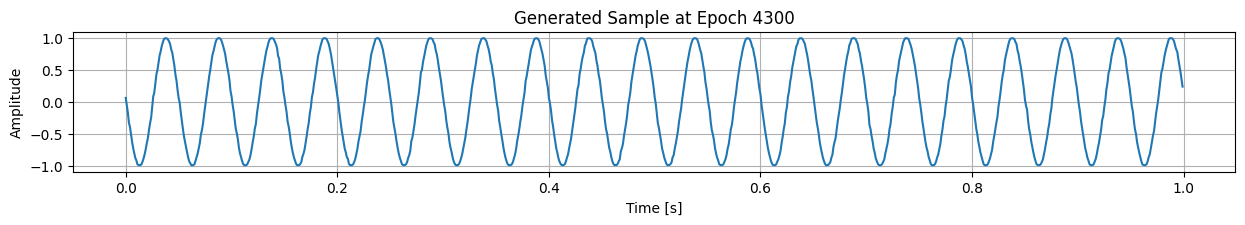

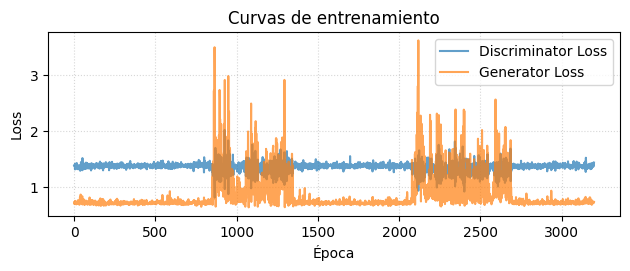

Epoch [4320/5000], D Loss: 1.3442, G Loss: 0.7264
Epoch [4340/5000], D Loss: 1.3928, G Loss: 0.7460
Epoch [4360/5000], D Loss: 1.1931, G Loss: 1.4573
Epoch [4380/5000], D Loss: 1.3853, G Loss: 0.9636
Epoch [4400/5000], D Loss: 1.3373, G Loss: 0.7675


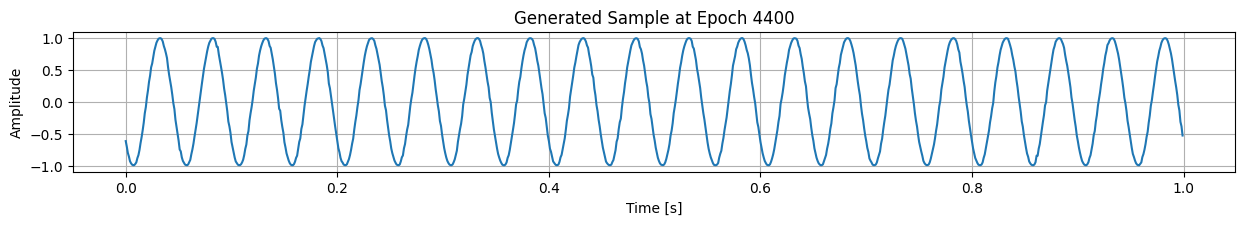

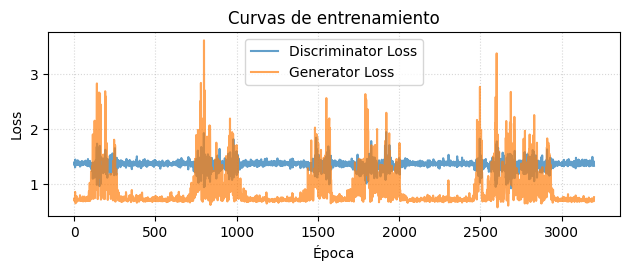

Epoch [4420/5000], D Loss: 1.4575, G Loss: 1.2166
Epoch [4440/5000], D Loss: 1.4028, G Loss: 0.9941
Epoch [4460/5000], D Loss: 1.5446, G Loss: 1.3291
Epoch [4480/5000], D Loss: 1.3499, G Loss: 0.8306
Epoch [4500/5000], D Loss: 1.3778, G Loss: 0.7350


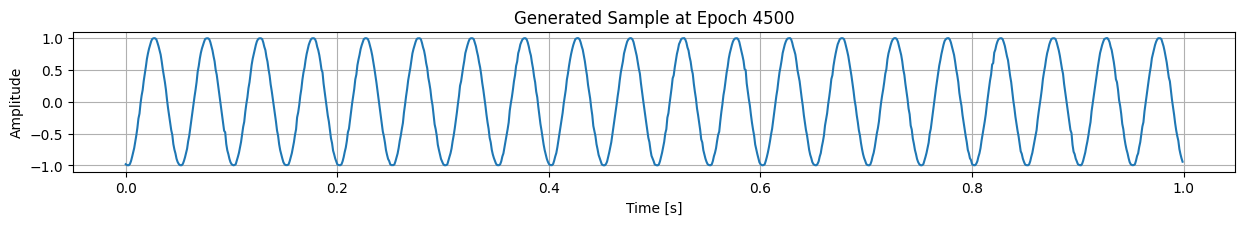

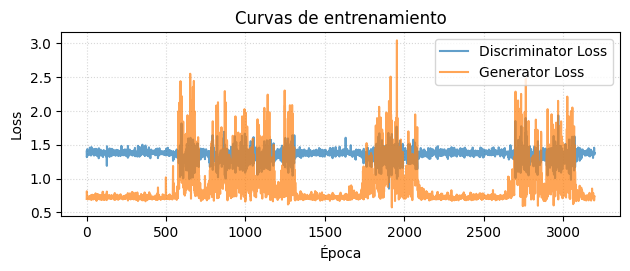

Epoch [4520/5000], D Loss: 1.1588, G Loss: 1.9147
Epoch [4540/5000], D Loss: 1.4188, G Loss: 0.7318
Epoch [4560/5000], D Loss: 1.3580, G Loss: 0.7242
Epoch [4580/5000], D Loss: 1.4412, G Loss: 0.7715
Epoch [4600/5000], D Loss: 1.4004, G Loss: 0.7147


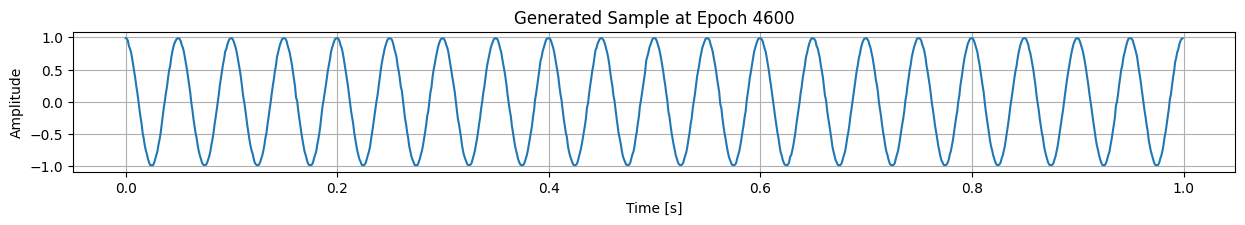

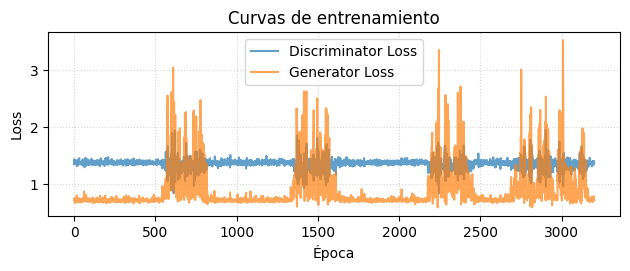

Epoch [4620/5000], D Loss: 1.3898, G Loss: 0.8333
Epoch [4640/5000], D Loss: 1.4332, G Loss: 0.7665
Epoch [4660/5000], D Loss: 1.3856, G Loss: 0.7245
Epoch [4680/5000], D Loss: 1.3743, G Loss: 0.7351
Epoch [4700/5000], D Loss: 1.4040, G Loss: 0.8197


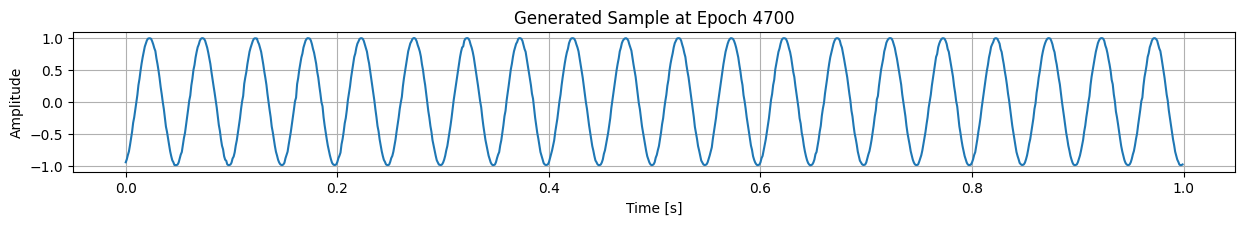

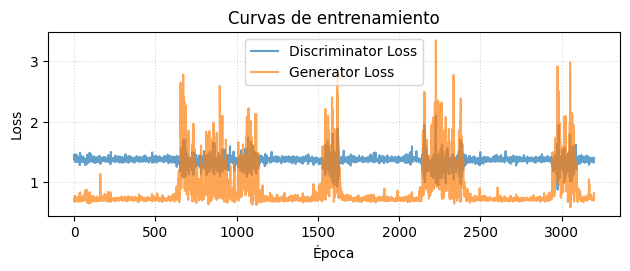

Epoch [4720/5000], D Loss: 1.3457, G Loss: 0.7338
Epoch [4740/5000], D Loss: 1.3668, G Loss: 0.7705
Epoch [4760/5000], D Loss: 1.2801, G Loss: 1.7261
Epoch [4780/5000], D Loss: 1.4159, G Loss: 0.7629
Epoch [4800/5000], D Loss: 1.3524, G Loss: 0.7336


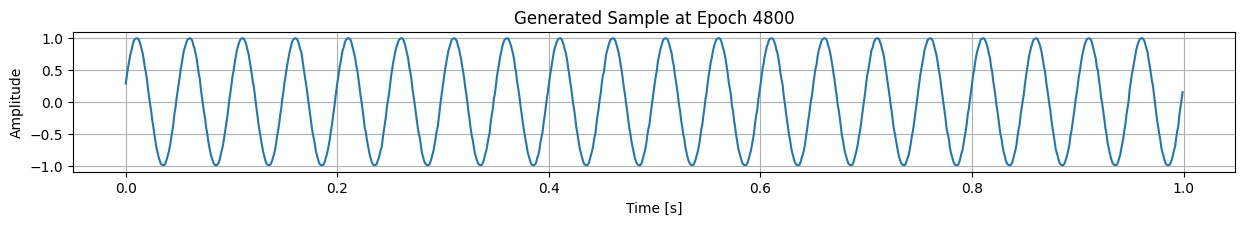

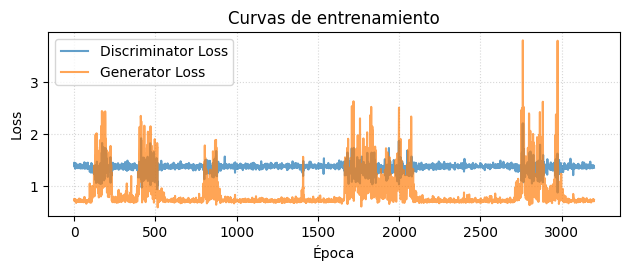

Epoch [4820/5000], D Loss: 1.8077, G Loss: 0.8864
Epoch [4840/5000], D Loss: 1.3843, G Loss: 0.7707
Epoch [4860/5000], D Loss: 1.3785, G Loss: 0.7752
Epoch [4880/5000], D Loss: 1.3264, G Loss: 0.9066
Epoch [4900/5000], D Loss: 1.2351, G Loss: 1.8828


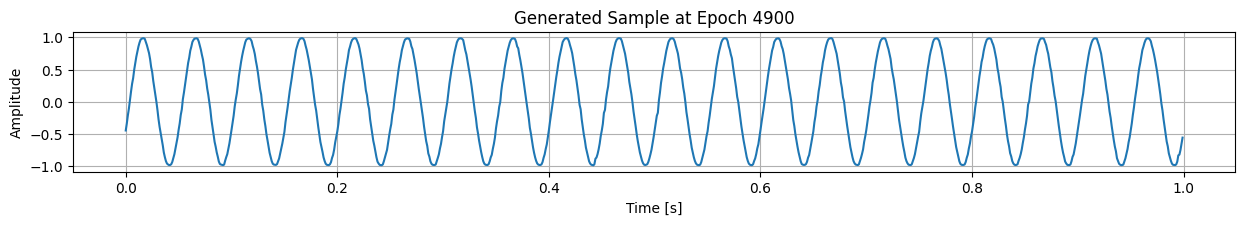

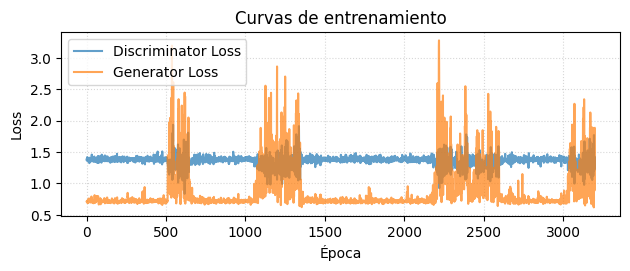

Epoch [4920/5000], D Loss: 1.4037, G Loss: 0.7752
Epoch [4940/5000], D Loss: 1.3539, G Loss: 0.7731
Epoch [4960/5000], D Loss: 1.1294, G Loss: 1.4073
Epoch [4980/5000], D Loss: 1.3404, G Loss: 0.7586
Epoch [5000/5000], D Loss: 1.2032, G Loss: 1.5265


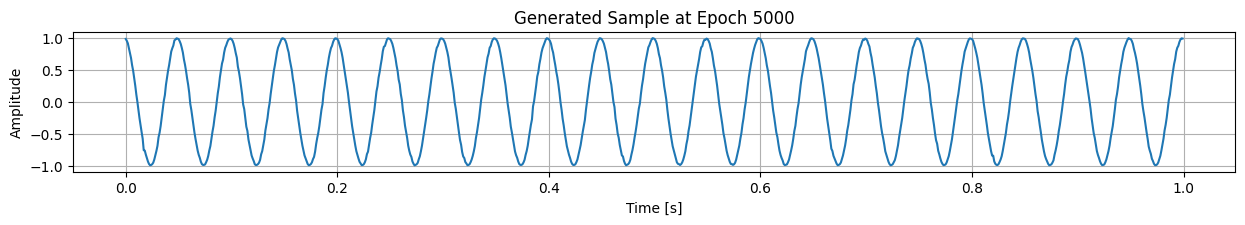

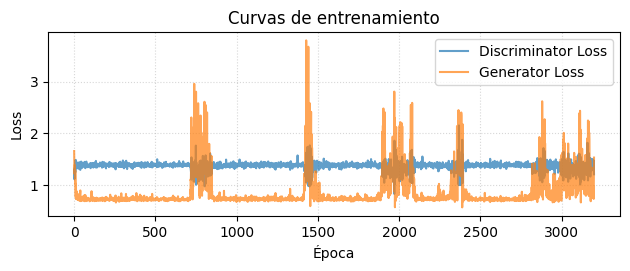

***************** Training finished!!! ****************


In [221]:
class Trainer:
    def __init__(self, generator, discriminator, g_optimizer, d_optimizer, criterion, device):
        self.generator = generator
        self.discriminator = discriminator
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.criterion = criterion
        self.device = device

    def train_step(self, real_data):
        batch_size = real_data.size(0)
        real_data = real_data.to(self.device)

        # Train Discriminator
        self.d_optimizer.zero_grad()

        # Real data
        real_labels = torch.ones(batch_size, 1).to(self.device)
        real_outputs = self.discriminator(real_data)
        d_loss_real = self.criterion(real_outputs, real_labels)

        # Fake data
        noise = torch.randn(batch_size, 100).to(self.device)
        fake_data = self.generator(noise)
        fake_labels = torch.zeros(batch_size, 1).to(self.device)
        fake_outputs = self.discriminator(fake_data.detach())
        d_loss_fake = self.criterion(fake_outputs, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        self.d_optimizer.step()

        # Train Generator
        self.g_optimizer.zero_grad()
        fake_outputs = self.discriminator(fake_data)
        g_loss = self.criterion(fake_outputs, real_labels)
        g_loss.backward()
        self.g_optimizer.step()

        return d_loss.item(), g_loss.item()

## Creacion del GAN vanilla
noise_dim = 100
output_dim = X_dataset.shape[1]

generator = Generator(noise_dim=noise_dim, output_dim=output_dim).to(device)
discriminator = Discriminator(input_dim=output_dim).to(device)

g_optimizer = Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_optimizer = Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterion = nn.BCEWithLogitsLoss()

trainer = Trainer(generator, discriminator, g_optimizer, d_optimizer, criterion, device)

num_epochs = 5000
g_errors = []
d_errors = []


EPOCHS_TO_PLOT = 100
LOSS_MAX_VIEW = batch_size * EPOCHS_TO_PLOT

for epoch in range(num_epochs):
    for real_data in dataloader:
        d_loss, g_loss = trainer.train_step(real_data)
        d_errors.append(d_loss)
        g_errors.append(g_loss)

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}')

    if (epoch+1) % EPOCHS_TO_PLOT == 0:
        plt.figure(figsize=(15, 4))
        noise = torch.randn(1, noise_dim).to(device)
        generated_data = generator(noise).cpu().detach().numpy().reshape(-1)

        plt.subplot(2, 1, 1)
        plt.plot(Gen_DB_sin_instance.t, generated_data)
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title(f'Generated Sample at Epoch {epoch+1}')
        plt.grid()
        plt.show()

         # Graficar curvas de pérdida
        plt.subplot(2, 1, 2)
        plt.plot(d_errors[len(d_errors)-LOSS_MAX_VIEW:], label='Discriminator Loss', alpha=0.7)
        plt.plot(g_errors[len(g_errors)-LOSS_MAX_VIEW:], label='Generator Loss', alpha=0.7)
        plt.xlabel('Época')
        plt.ylabel('Loss')
        plt.title('Curvas de entrenamiento')
        plt.legend()
        plt.grid(ls=":", alpha=0.5)
        
        plt.tight_layout()
        plt.show()

print("***************** Training finished!!! ****************")



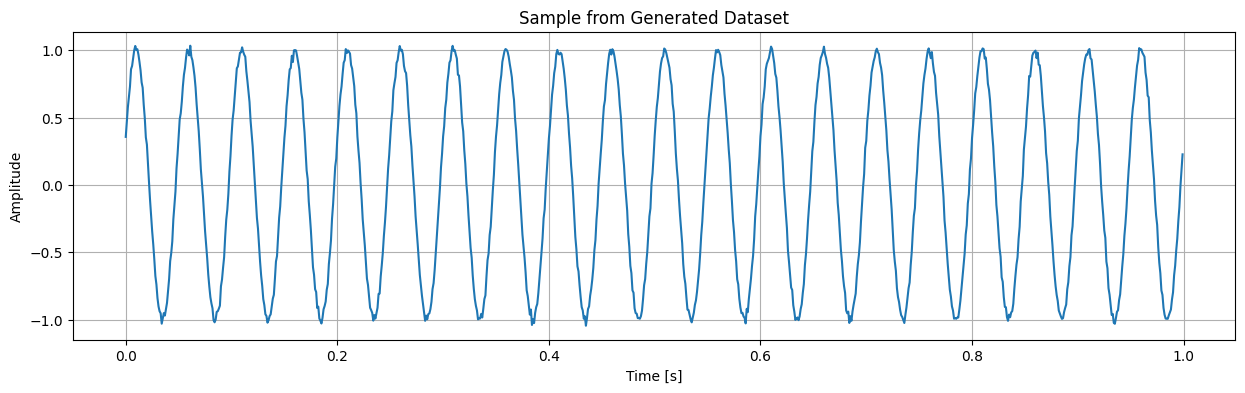

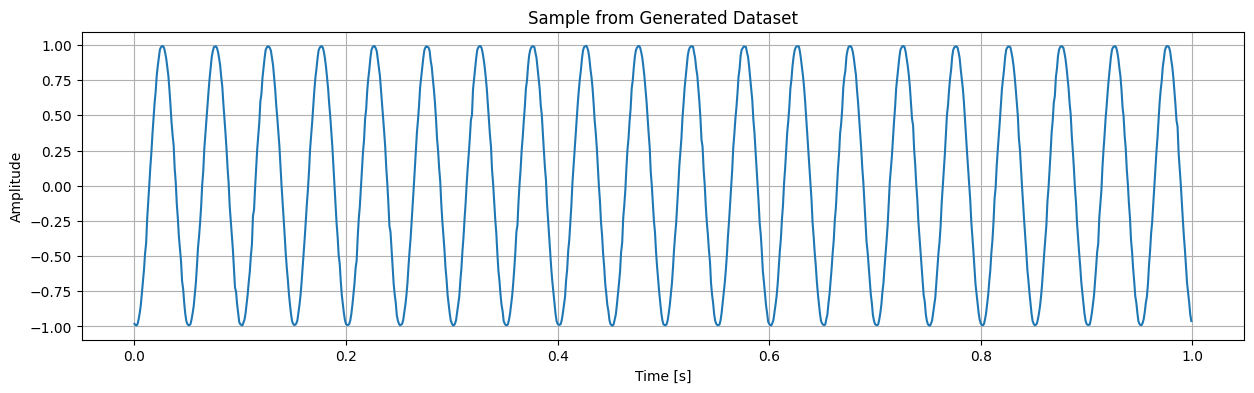

In [222]:
plt.figure(figsize=(15, 4))
plt.plot(Gen_DB_sin_instance.t, X_dataset[0,:])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sample from Generated Dataset')
plt.grid()
plt.show()

noise = torch.randn(1, noise_dim).to(device)
generated_data2 = generator(noise).cpu().detach().numpy().reshape(-1)


plt.figure(figsize=(15, 4))
plt.plot(Gen_DB_sin_instance.t, generated_data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sample from Generated Dataset')
plt.grid()
plt.show()


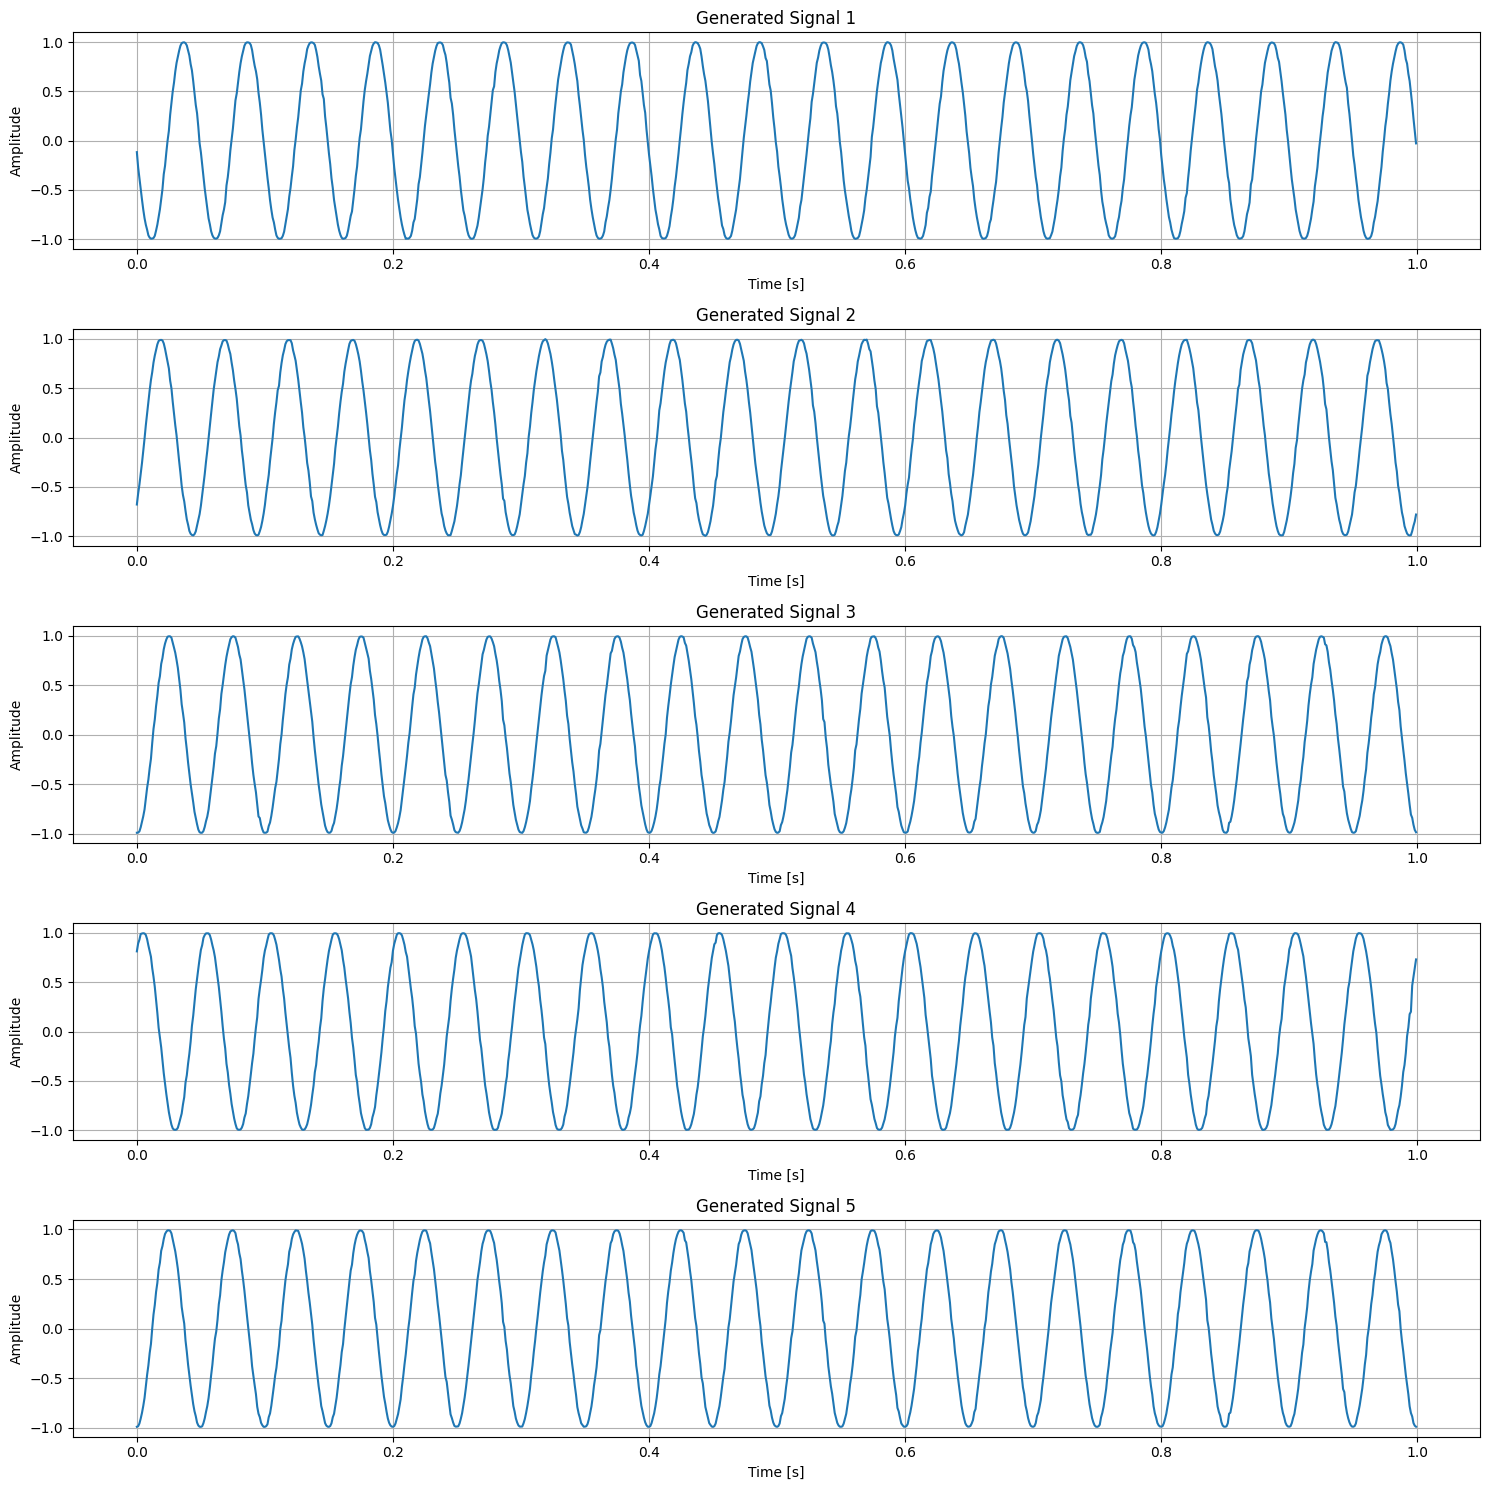

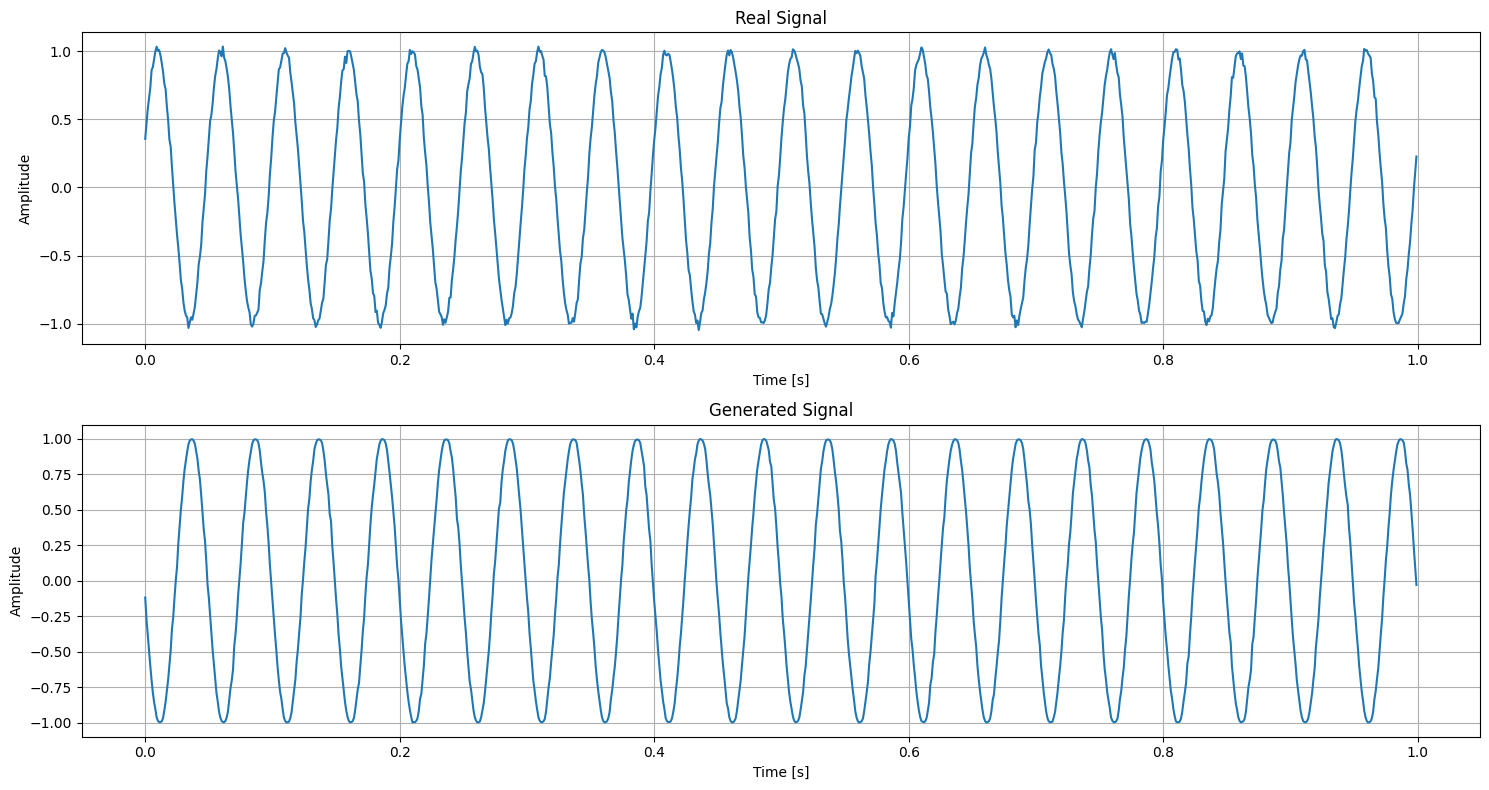

In [223]:
# Generar nuevas señales con el generador entrenado
generator.eval()  # Cambiar a modo evaluación

# Generar múltiples señales
num_samples = 5
noise = torch.randn(num_samples, noise_dim).to(device)

with torch.no_grad():
    generated_signals = generator(noise).cpu().numpy()

# Visualizar las señales generadas
fig, axes = plt.subplots(num_samples, 1, figsize=(15, 3*num_samples))

for i in range(num_samples):
    axes[i].plot(Gen_DB_sin_instance.t, generated_signals[i])
    axes[i].set_xlabel('Time [s]')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'Generated Signal {i+1}')
    axes[i].grid()

plt.tight_layout()
plt.show()

# Comparar una señal real vs una generada
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(Gen_DB_sin_instance.t, X_dataset[0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Real Signal')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(Gen_DB_sin_instance.t, generated_signals[0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Generated Signal')
plt.grid()

plt.tight_layout()
plt.show()

In [224]:
# Save the trained generator model
torch.save(generator.state_dict(), 'generator_model.pth')

# Save the trained discriminator model
torch.save(discriminator.state_dict(), 'discriminator_model.pth')

# Optionally, save the complete model with architecture
torch.save({
    'generator_state_dict': generator.state_dict(),
    'discriminator_state_dict': discriminator.state_dict(),
    'g_optimizer_state_dict': g_optimizer.state_dict(),
    'd_optimizer_state_dict': d_optimizer.state_dict(),
    'noise_dim': noise_dim,
    'output_dim': output_dim
}, 'gan_checkpoint.pth')

print("Models saved successfully!")
print("- generator_model.pth")
print("- discriminator_model.pth")
print("- gan_checkpoint.pth")

Models saved successfully!
- generator_model.pth
- discriminator_model.pth
- gan_checkpoint.pth


In [225]:
import os

# Create a module file with the Generator class
generator_module_code = '''import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, noise_dim=100, output_dim=1000):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)
'''

# Save to a Python file
with open('generator_model.py', 'w') as f:
    f.write(generator_module_code)

print("✓ Generator class saved to generator_model.py")


✓ Generator class saved to generator_model.py


In [ ]:
# # Load the trained generator model
# loaded_generator = Generator(noise_dim=noise_dim, output_dim=output_dim).to(device)
# loaded_generator.load_state_dict(torch.load('generator_model.pth'))
# loaded_generator.eval()

# print("Generator model loaded successfully!")
# print(f"Model architecture:\n{loaded_generator}")

In [ ]:
"""
class Generator(nn.Module):
    def __init__(self, noise_dim=100, output_dim=1000):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)
"""


## Importar el modelo

In [226]:
from generator_model import GeneratorGAN

## Importar el modelo
loaded_generator = GeneratorGAN(noise_dim=noise_dim, output_dim=output_dim).to(device)
loaded_generator.load_state_dict(torch.load('generator_model.pth'))
loaded_generator.eval()

print("Generator model loaded successfully!")
print(f"Model architecture:\n{loaded_generator}")

Generator model loaded successfully!
Model architecture:
GeneratorGAN(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=1024, out_features=1000, bias=True)
    (7): Tanh()
  )
)


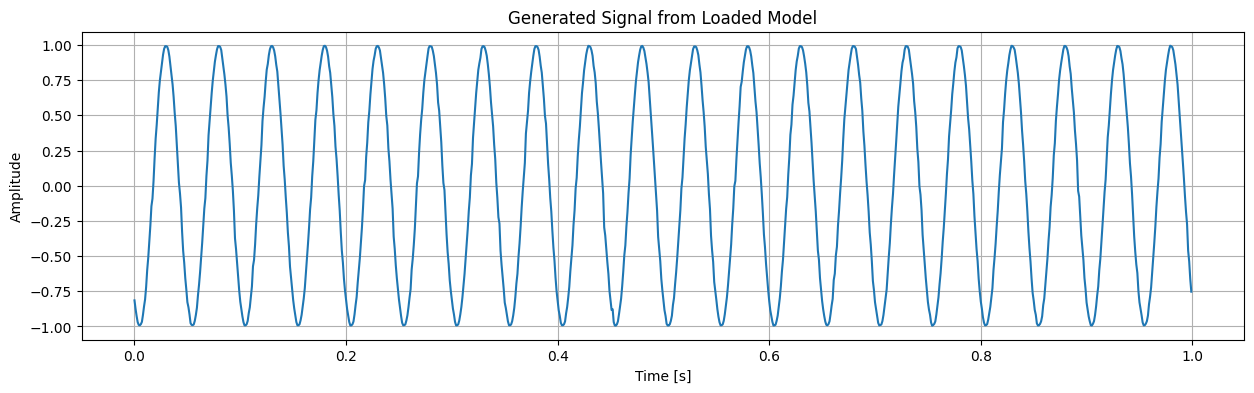

In [231]:
# Generate data signal using the loaded generator
loaded_generator.eval()

# Generate a single signal
noise = torch.randn(1, noise_dim).to(device)

with torch.no_grad():
    generated_signal = loaded_generator(noise).cpu().numpy().reshape(-1)

# Plot the generated signal
plt.figure(figsize=(15, 4))
plt.plot(Gen_DB_sin_instance.t, generated_signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Generated Signal from Loaded Model')
plt.grid()
plt.show()